In [1]:
import pandas as pd
from datetime import date
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

from DataSynthesizer.DataDescriber import DataDescriber
from DataSynthesizer.DataGenerator import DataGenerator
from DataSynthesizer.ModelInspector import ModelInspector
from DataSynthesizer.lib.utils import read_json_file, display_bayesian_network

In [2]:
mergedData = pd.read_excel('TabellaFinale.xlsx', sheet_name=None)

In [3]:
mergedData['Sheet1'].head()

Unnamed: 0  HDN_CODE Sesso  ETA                DATA  ASCVD_Score  DATA_INT  \
0           7      2236     M   64 2021-02-26 00:00:00        27.30       422   
1           6      6426     M   47 2021-04-02 00:00:00         2.56       457   
2          18      8377     M   56 2020-08-31 00:00:00         7.80       243   
3          51     11463     M   71 2020-08-31 00:00:00        24.74       243   
4          53     11463     M   71 2021-03-31 10:54:33          NaN       456   

   num_visita  Charlson_Totale Charlson_Diabete  ...  DASS21 stress  \
0           0              NaN              NaN  ...            0.0   
1           0              2.0           0 = No  ...            3.0   
2           0              1.0           0 = No  ...            NaN   
3           0              3.0           0 = No  ...            NaN   
4           1              NaN              NaN  ...            0.0   

   Stress level  DASS21 anxiety  Anxiety level  DASS21 depression  \
0        Normal             0.0         Normal                0.0   
1        Normal             4.0           Mild                7.0   
2           NaN             NaN            NaN                NaN   
3           NaN             NaN            NaN                NaN   
4        Normal             0.0         Normal                0.0   

   Depression level  Insomnia severity index  \
0            Normal                      8.0   
1          Moderate                      6.0   
2               NaN                      NaN   
3               NaN                      NaN   
4            Normal                      0.0   

                            ISI level  SF36 general health Resilience  
0               Subthreshold Insomnia                 75.0       64.0  
1  No Clinically Significant Insomnia                 10.0       54.0  
2                                 NaN                  NaN        NaN  
3                                 NaN                  NaN        NaN  
4  No Clinically Significant Insomnia                 90.0       88.0  

[5 rows x 80 columns]

In [4]:
# tolgo la prima colonna e seleziono il primo foglio
df = mergedData['Sheet1'].iloc[:, 1:]

In [5]:
dfSenzaData = df.drop(columns=['DATA', 'num_visita', 'DATA_INT'])

In [6]:
dfSenzaData.to_csv('TabellaFinaleSenzaData.csv')
dfSenzaData.to_excel('TabellaFinaleSenzaData.xlsx')

In [7]:
dfSenzaData.head()

HDN_CODE Sesso  ETA  ASCVD_Score  Charlson_Totale Charlson_Diabete  \
0      2236     M   64        27.30              NaN              NaN   
1      6426     M   47         2.56              2.0           0 = No   
2      8377     M   56         7.80              1.0           0 = No   
3     11463     M   71        24.74              3.0           0 = No   
4     11463     M   71          NaN              NaN              NaN   

   Stifness    CAP  FrailtyPhenotypeBool  EGA_HB  ...  DASS21 stress  \
0       6.7  167.0                   0.0    15.6  ...            0.0   
1       NaN    NaN                   1.0     NaN  ...            3.0   
2       NaN    NaN                   NaN     NaN  ...            NaN   
3       NaN    NaN                   NaN    14.8  ...            NaN   
4       NaN    NaN                   0.0     NaN  ...            0.0   

   Stress level  DASS21 anxiety  Anxiety level  DASS21 depression  \
0        Normal             0.0         Normal                0.0   
1        Normal             4.0           Mild                7.0   
2           NaN             NaN            NaN                NaN   
3           NaN             NaN            NaN                NaN   
4        Normal             0.0         Normal                0.0   

  Depression level Insomnia severity index  \
0           Normal                     8.0   
1         Moderate                     6.0   
2              NaN                     NaN   
3              NaN                     NaN   
4           Normal                     0.0   

                            ISI level  SF36 general health  Resilience  
0               Subthreshold Insomnia                 75.0        64.0  
1  No Clinically Significant Insomnia                 10.0        54.0  
2                                 NaN                  NaN         NaN  
3                                 NaN                  NaN         NaN  
4  No Clinically Significant Insomnia                 90.0        88.0  

[5 rows x 76 columns]

In [8]:
dfSenzaData = dfSenzaData[(dfSenzaData['FrailtyPhenotypeBool'].notna()) & (dfSenzaData['Resilience'].notna())]

In [9]:
#dfSenzaData = dfSenzaData[['HDN_CODE', 'Charlson_Totale', 'Charlson_Diabete']]

In [10]:
dfSenzaData.to_csv('TabellaFinaleSenzaDataIndependent.csv')

In [11]:
#soloETA = dfSenzaData[['HDN_CODE','ETA']]

In [12]:
#soloETA.to_csv('SoloETA.csv')

## Parametri utente

In [13]:
input_data = 'TabellaFinaleSenzaDataIndependent.csv' 
#mode = 'correlated_attribute_mode'
description_file = 'description_completa_independent.json'
synthetic_data = 'synthetic_data_independent.csv'

In [14]:
# An attribute is categorical if its domain size is less than this threshold.
threshold_value = 15

# specify categorical attributes
categorical_attributes = {'Sesso':True,
                            #'num_visita':True,
                            'Charlson_Diabete':True,
                            'Charlson_Totale':True,
                            'FrailtyPhenotypeBool':True,
                            'Pneumo_ScalaBorg':True,
                            'TestCammino6Min_BorgBase':True,
                            'TestCammino6Min_BorgEnd':True,
                            'Alcool':True,
                            'Fumatore':True,
                            'Sintomi_Cadute':True,
                            'Sintomi_DifficoltaDeglutizione':True,
                            'Sintomi_DistUdito':True,
                            'Sintomi_DistVista':True,
                            'SintomiNeuropsico_Ageusia':True,
                            'SintomiNeuropsico_Anosmia':True,
                            'SintomiNeuropsico_Astenia':True,
                            'SintomiNeuropsico_CognitivoAttenzione':True,
                            'SintomiNeuropsico_CognitivoConcentrazione':True,
                            'SintomiNeuropsico_CognitivoMemoria':True,
                            'SintomiNeuropsico_DistEquilibrio':True,
                            'SintomiNeuropsico_DistSonno':True,
                            'SintomiNeuropsico_DoloriMuscolari':True,
                            'SintomiNeuropsico_Effluvium':True,
                            'Descrizione':True,
                            'AssumePiuFarmaciGiorno':True,
                            'PersoPeso':True,
                            'CamminareMenoUltimoAnno':True,
                            'CaduteUltimoAnno':True,
                            'SentirsiSolo':True,
                            'PuoContareSuQualcuno':True,
                            'DifficoltaEconomicheSpeseSanitarie':True,
                            'EQ5D5L health score':True,
                            'DASS21 stress':True,
                            'Anxiety level':True,
                            'DASS21 depression':True,
                            'Depression level':True,
                            'Insomnia severity index':True,
                            'ISI level':True
                         }

#categorical_attributes = {'Charlson_Totale':True,
#                         'Charlson_Diabete':True}

# specify which attributes are candidate keys of input dataset.
candidate_keys = {'HDN_CODE':True}

# A parameter in Differential Privacy. It roughly means that removing a row in the input dataset will not 
# change the probability of getting the same output more than a multiplicative difference of exp(epsilon).
# Increase epsilon value to reduce the injected noises. Set epsilon=0 to turn off differential privacy.
epsilon = 1

# The maximum number of parents in Bayesian network, i.e., the maximum number of incoming edges.
degree_of_bayesian_network = 3

# Number of tuples generated in synthetic dataset.
num_tuples_to_generate = 176

In [15]:
# istanzio il data describer
describer = DataDescriber(category_threshold=threshold_value)
describer.describe_dataset_in_independent_attribute_mode(dataset_file=input_data, 
                                                        epsilon=epsilon,
                                                        #k = degree_of_bayesian_network,
                                                        attribute_to_is_categorical=categorical_attributes,
                                                        attribute_to_is_candidate_key=candidate_keys)
describer.describe_dataset_in_random_mode(input_data)
describer.save_dataset_description_to_file(description_file)

In [16]:
#display_bayesian_network(describer.bayesian_network)

In [17]:

generator = DataGenerator()
generator.generate_dataset_in_independent_mode(num_tuples_to_generate, description_file)
generator.save_synthetic_data(synthetic_data)

In [18]:
dfs = pd.read_csv(synthetic_data)

(array([72., 71., 79., 49., 28., 26.,  5.,  2.,  2.,  5.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

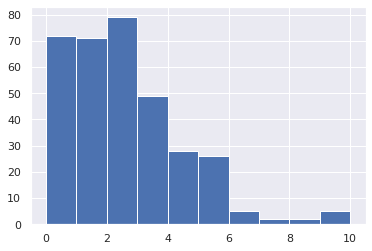

In [19]:
plt.hist(df['Charlson_Totale'])

(array([27., 26., 21., 24., 16., 15.,  0.,  0.,  0., 47.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

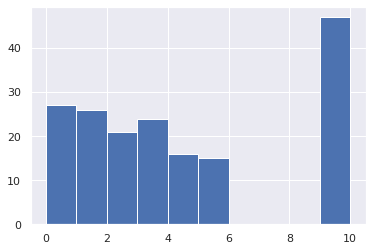

In [20]:
plt.hist(dfs['Charlson_Totale'])

## Ispector

In [21]:
# Read both datasets using Pandas.
input_df = df
synthetic_df = dfs.iloc[:, 1:]
# Read attribute description from the dataset description file.
attribute_description = read_json_file(description_file)['attribute_description']

inspector = ModelInspector(input_df, synthetic_df, attribute_description)


/home/gibbo/.local/lib/python3.7/site-packages/DataSynthesizer/ModelInspector.py:75: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(15, 5), dpi=120)


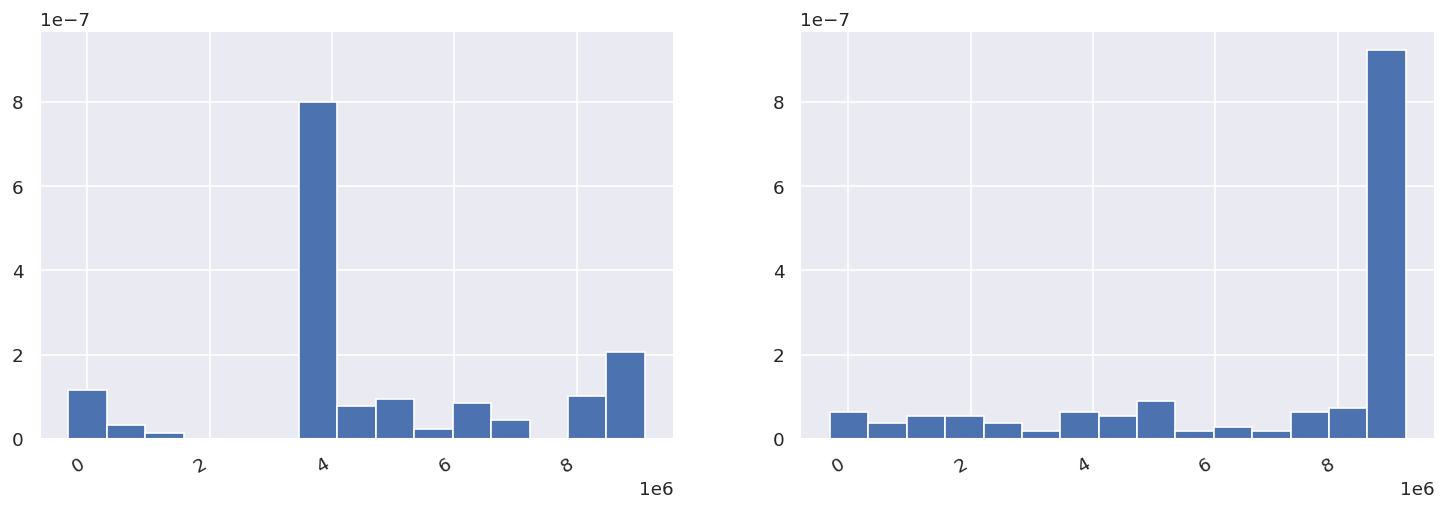

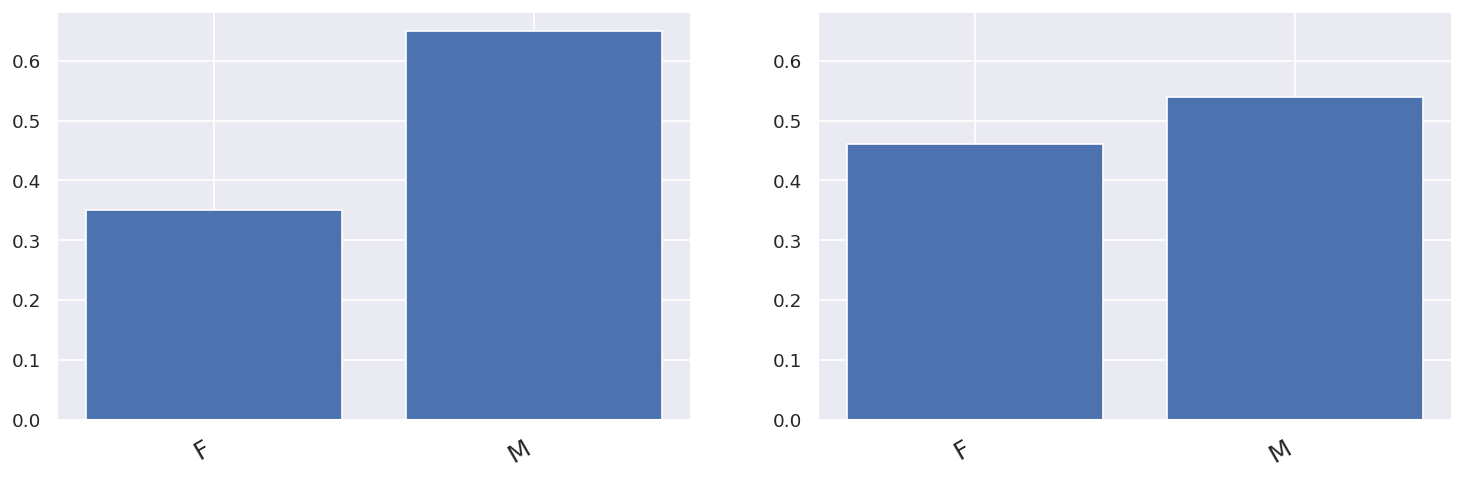

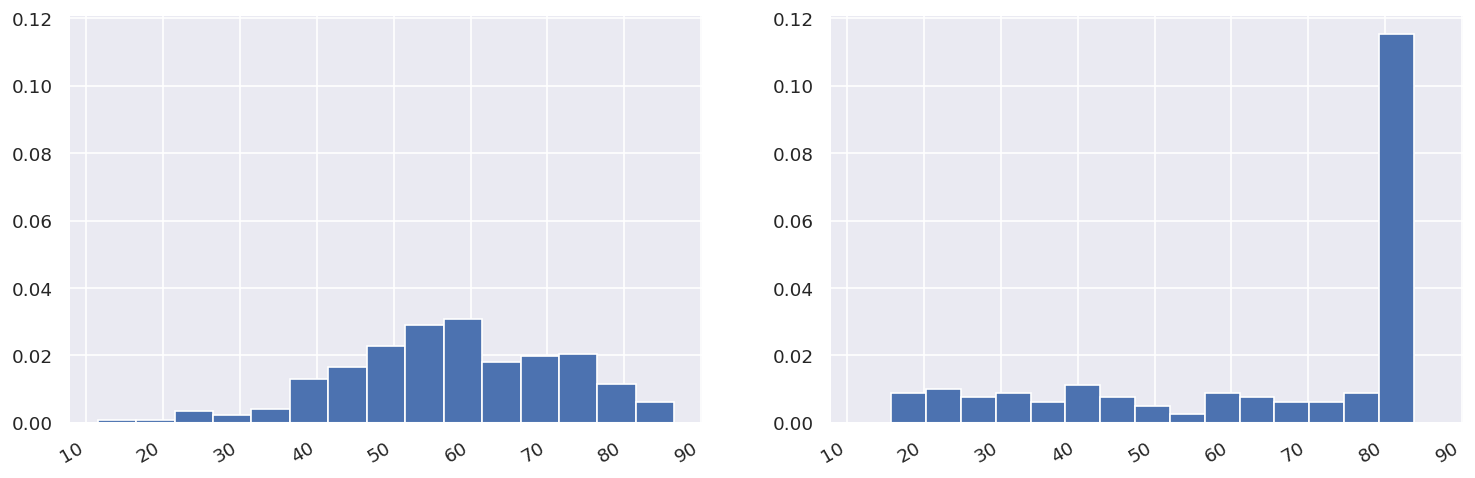

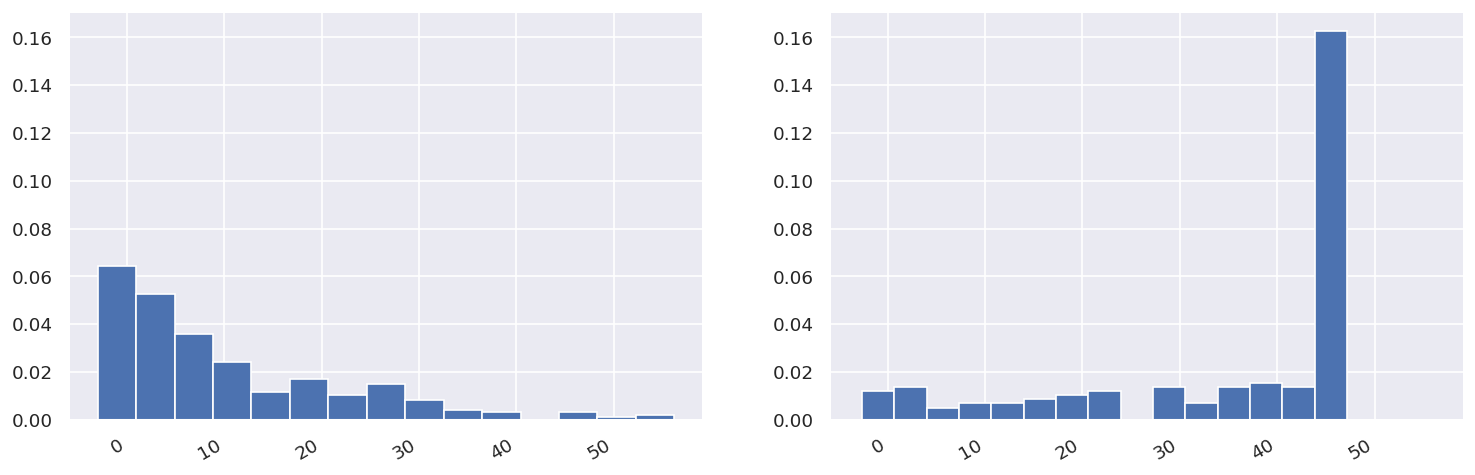

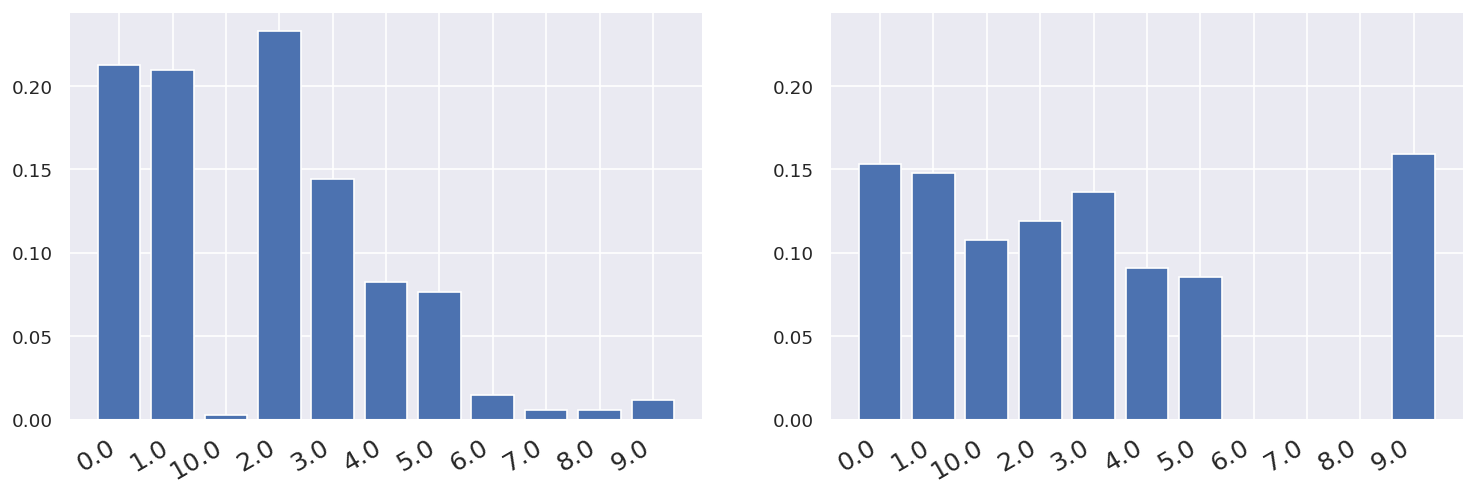

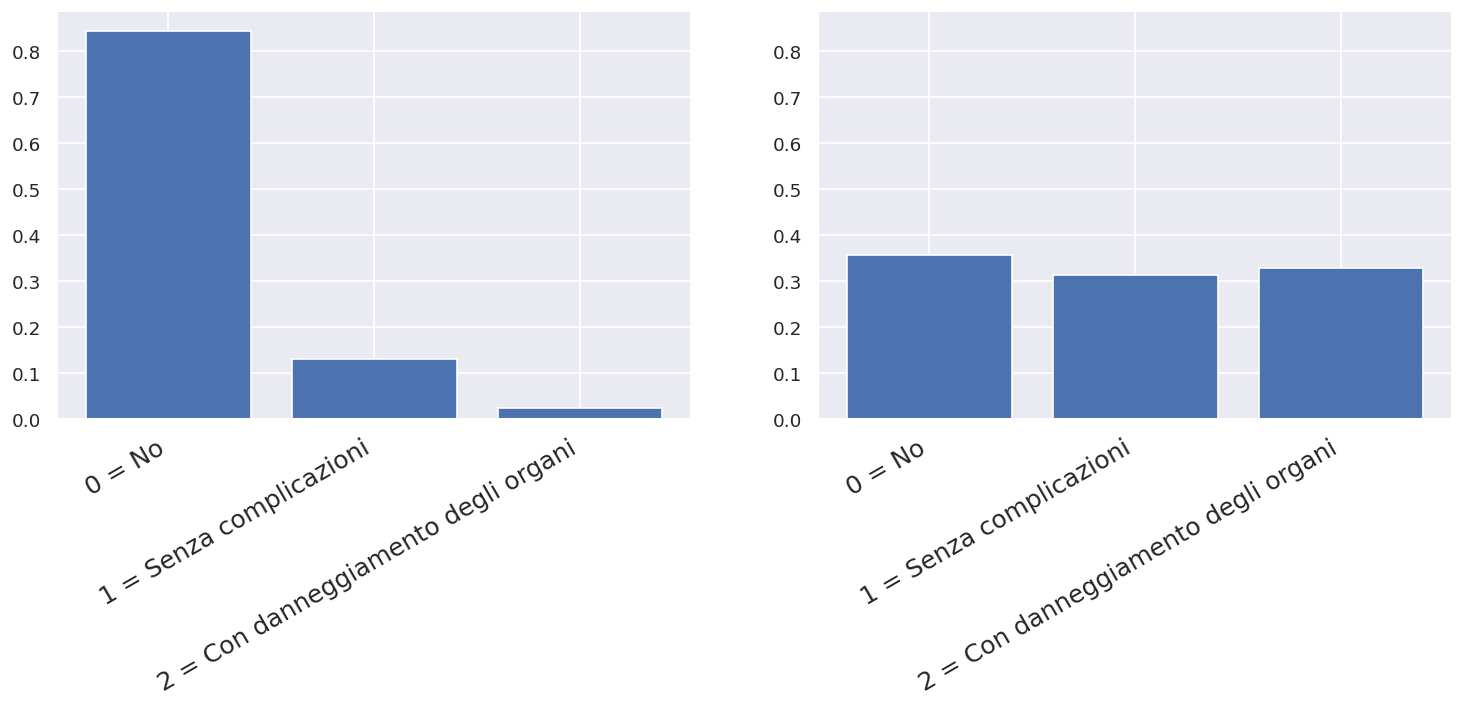

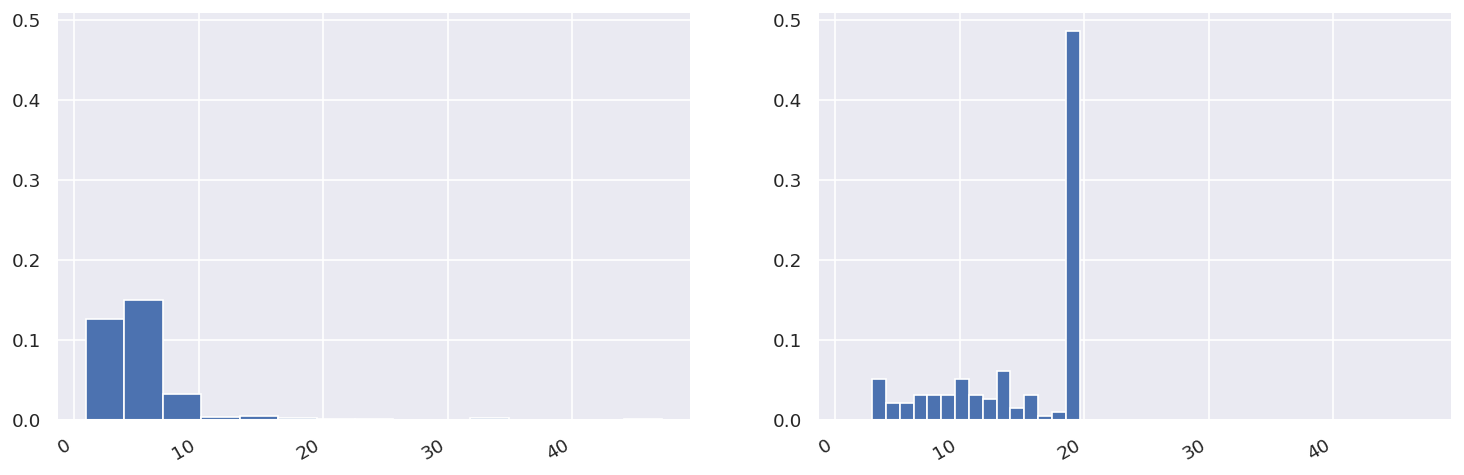

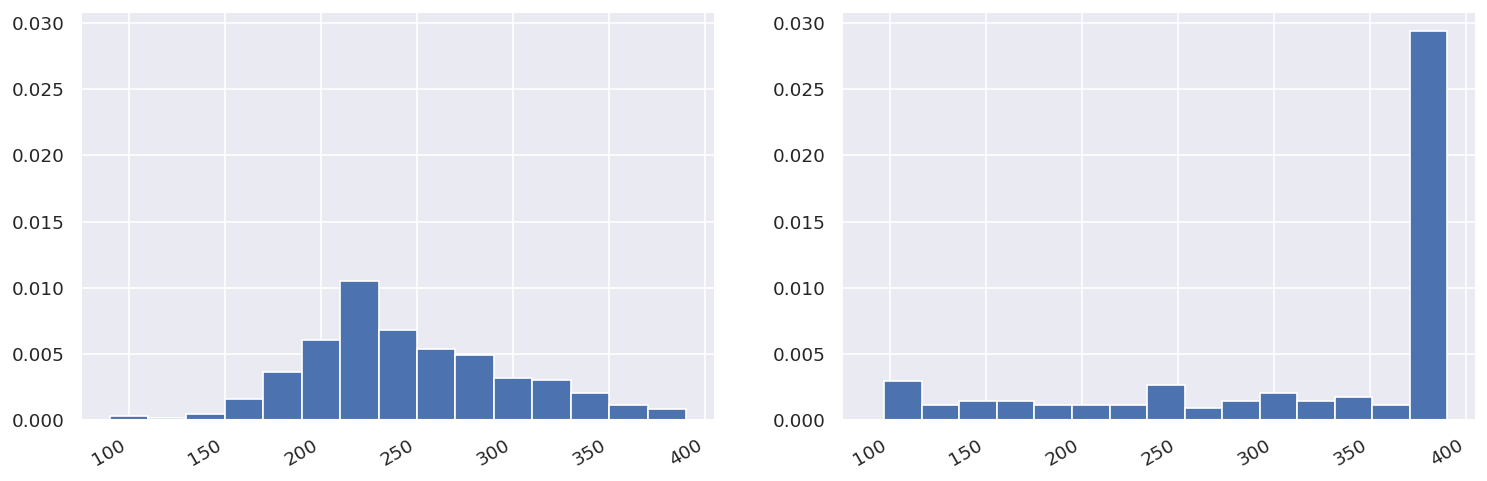

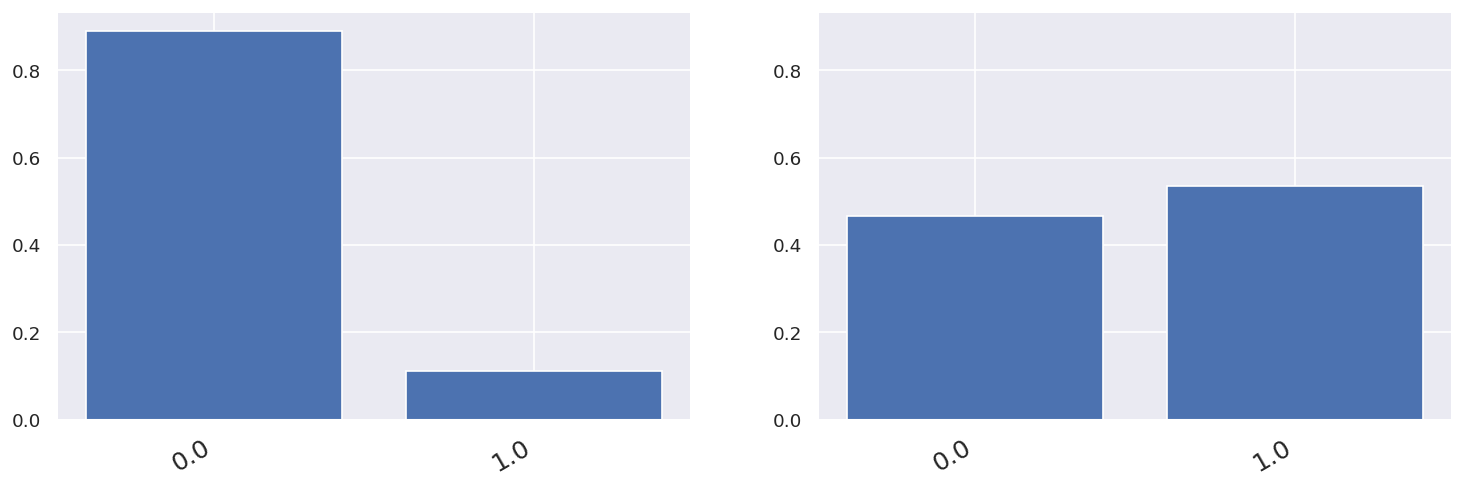

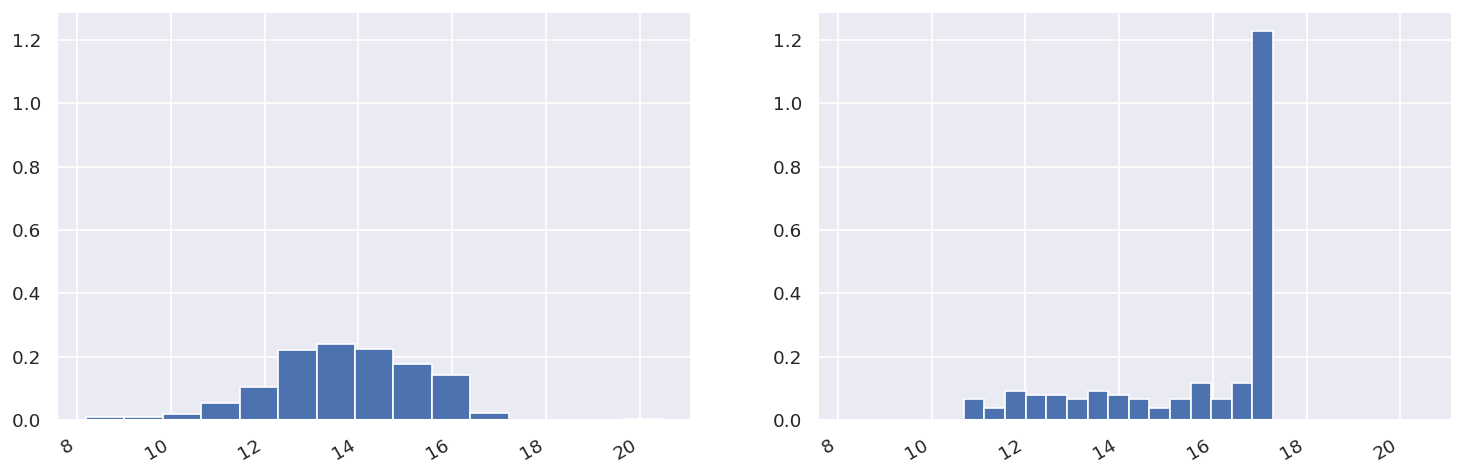

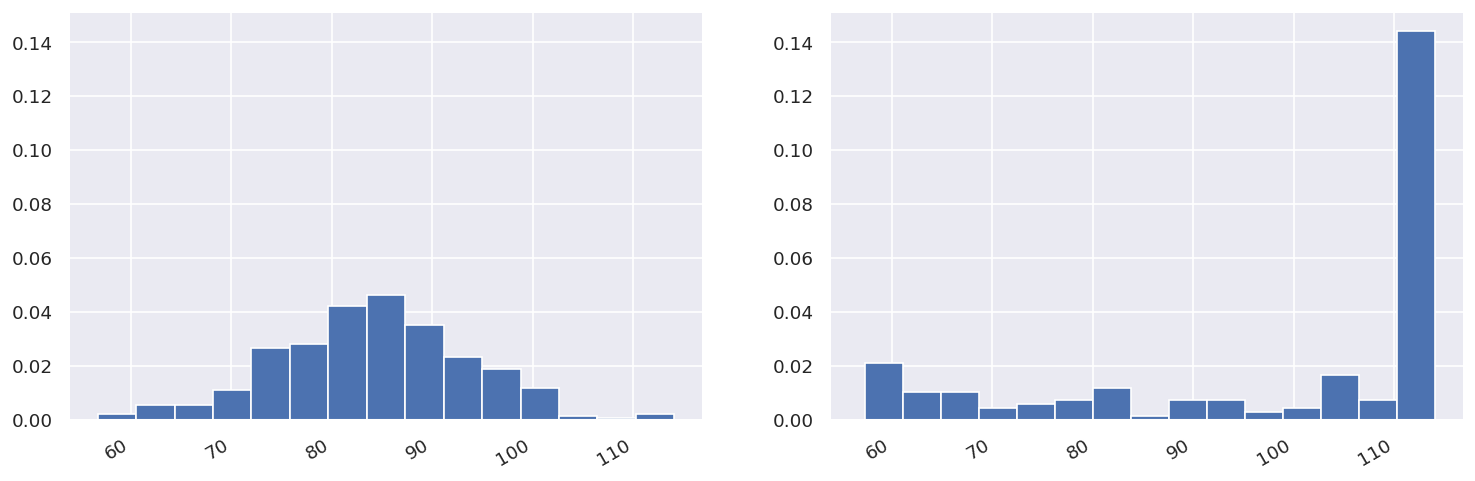

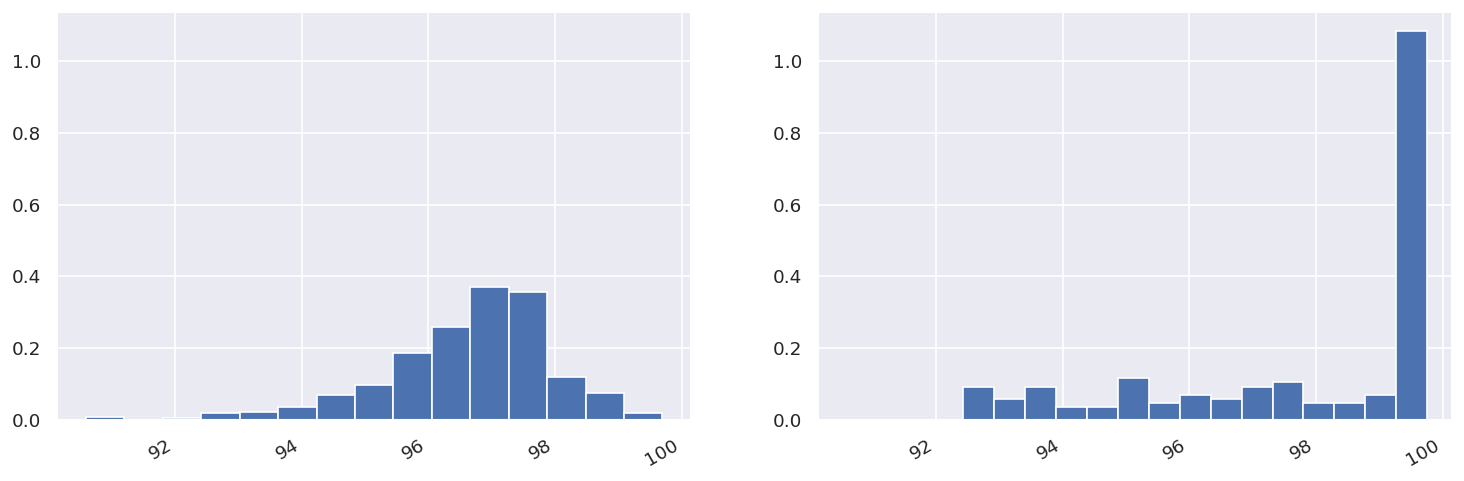

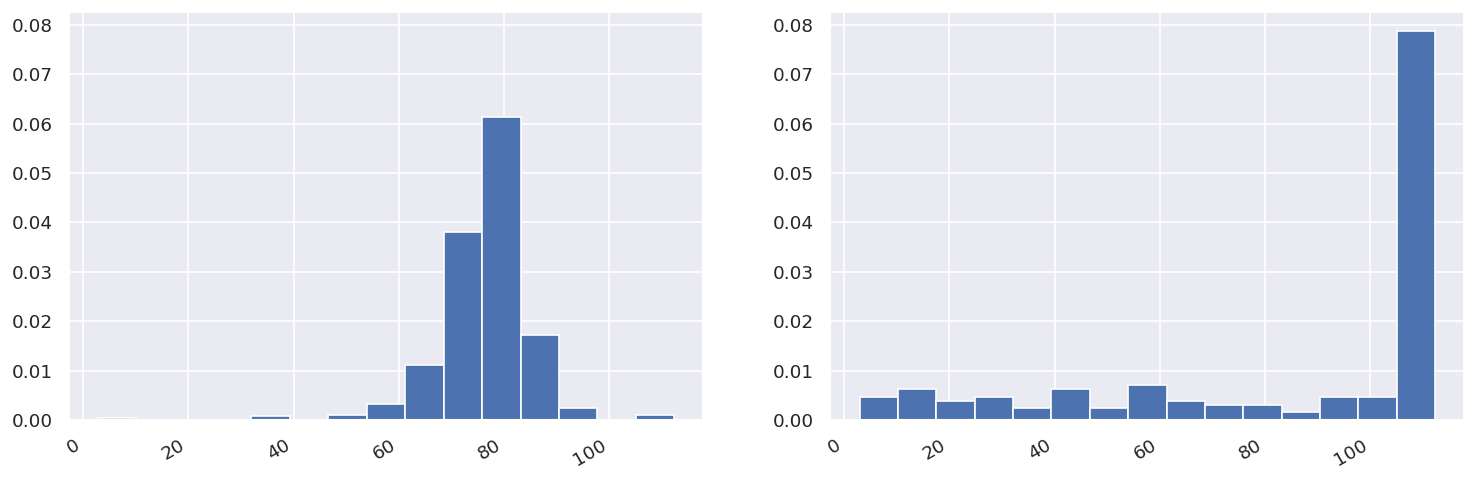

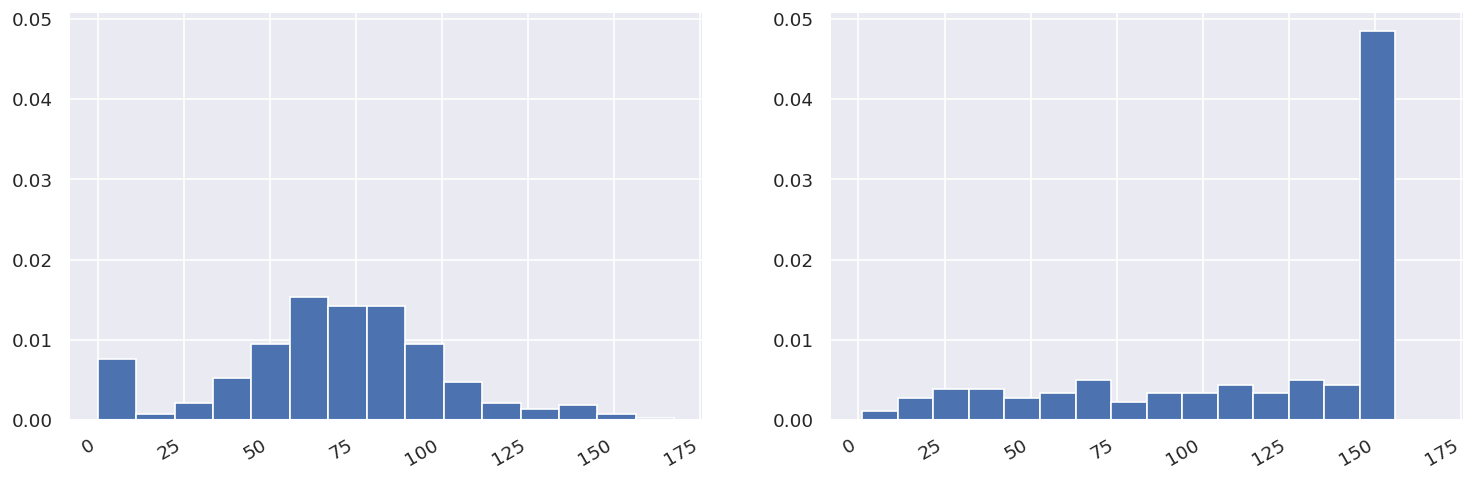

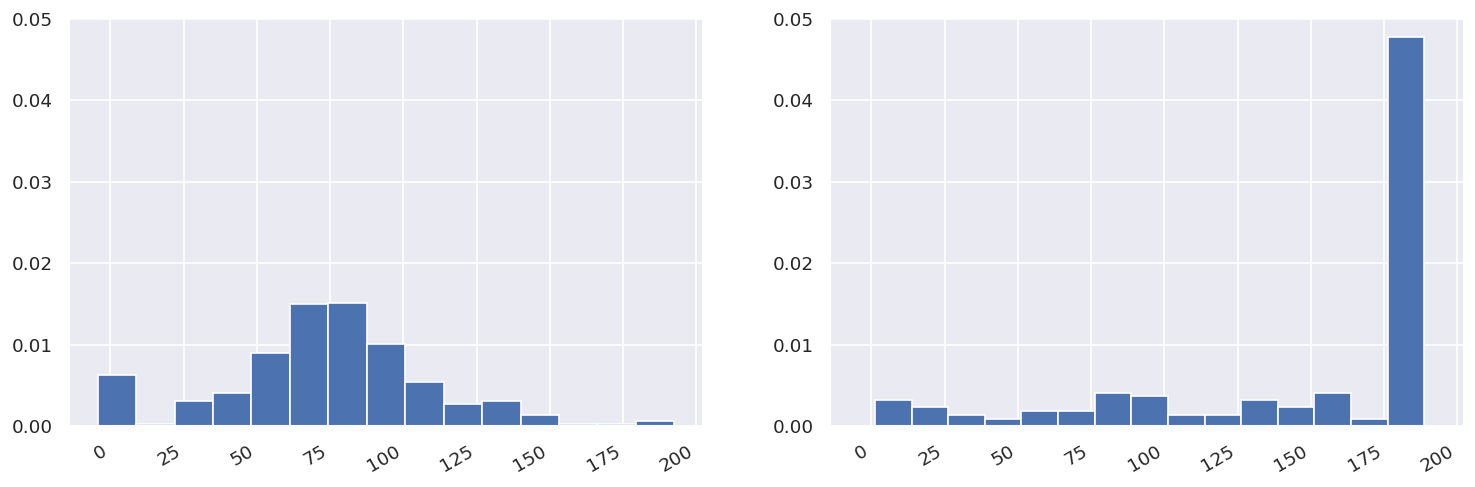

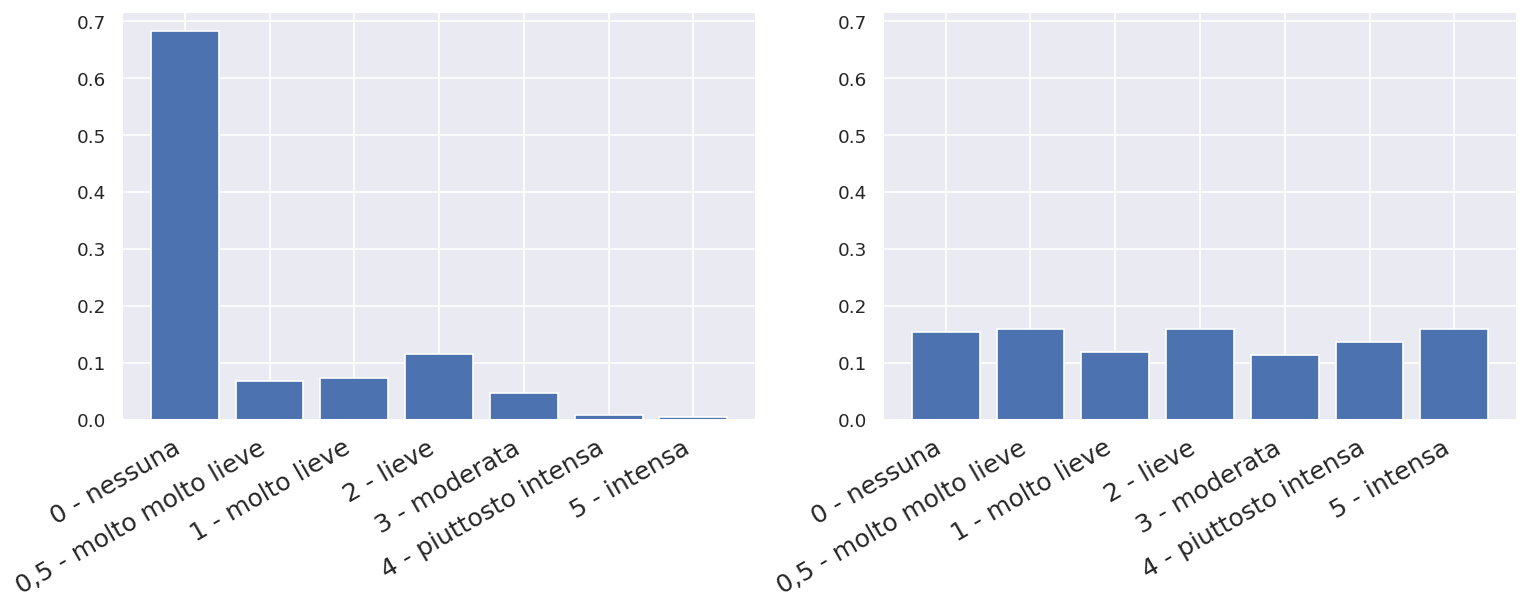

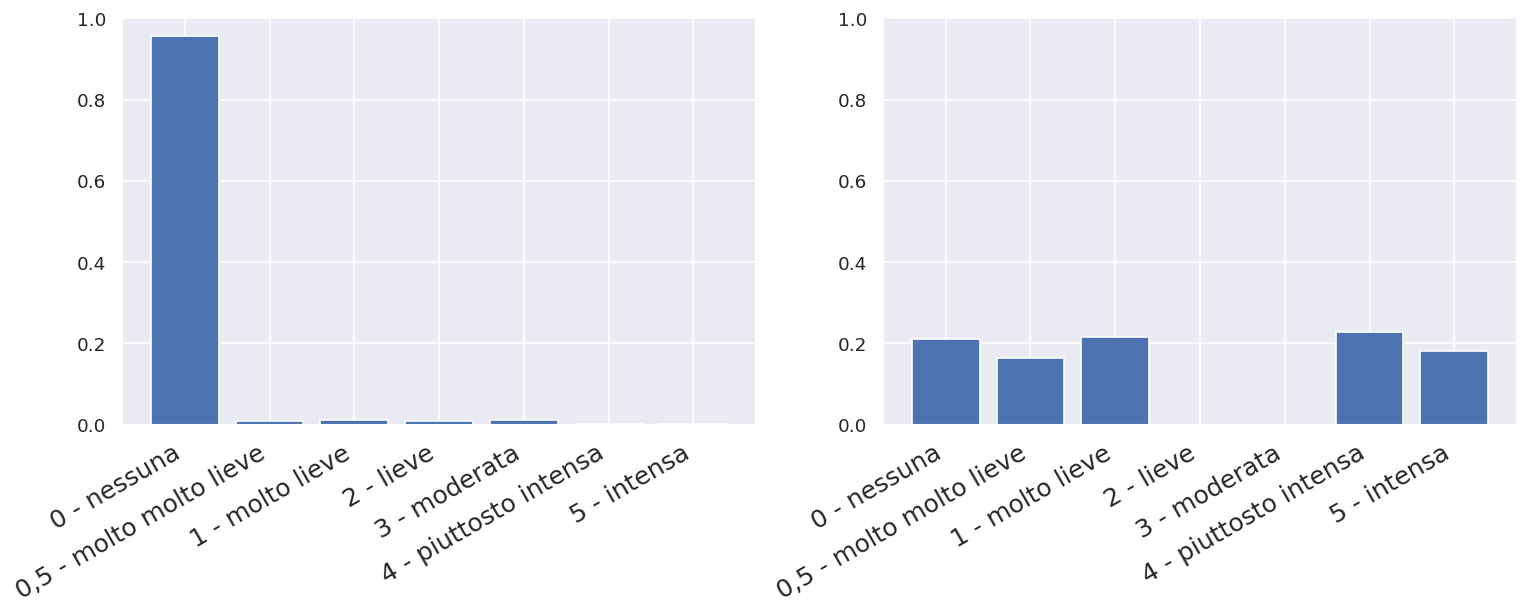

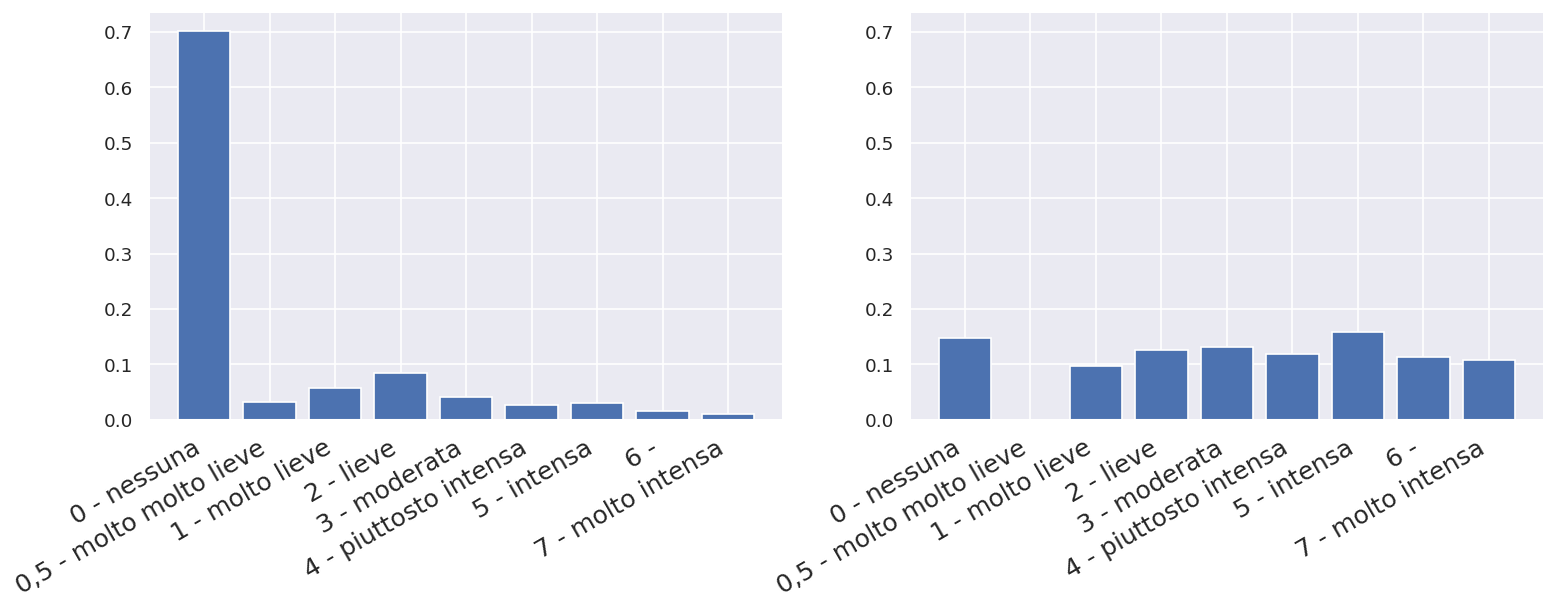

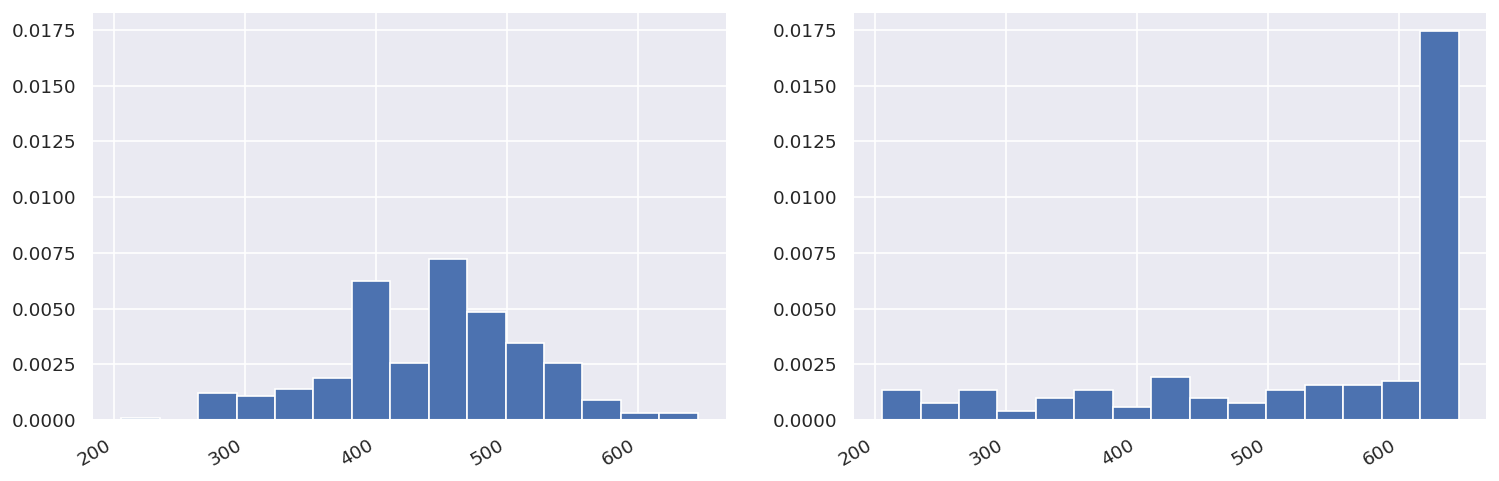

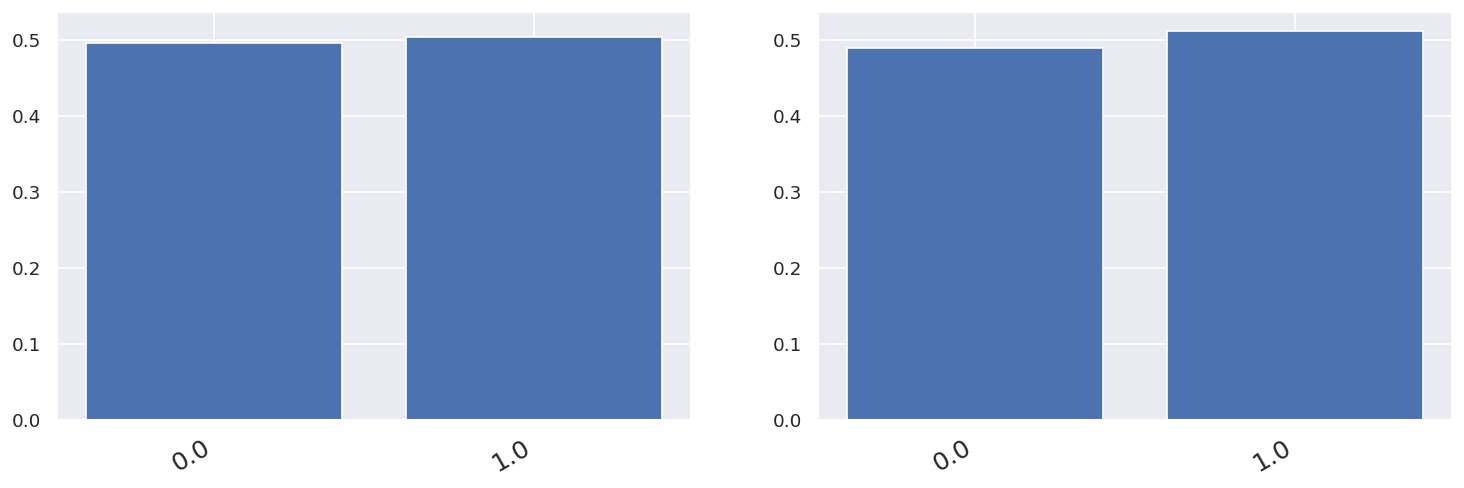

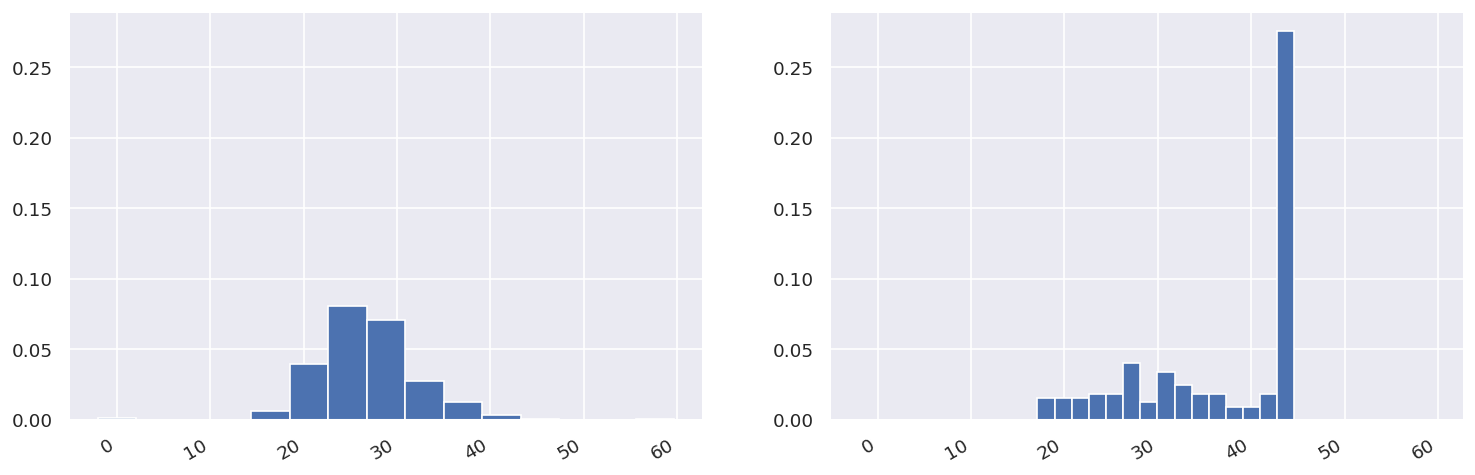

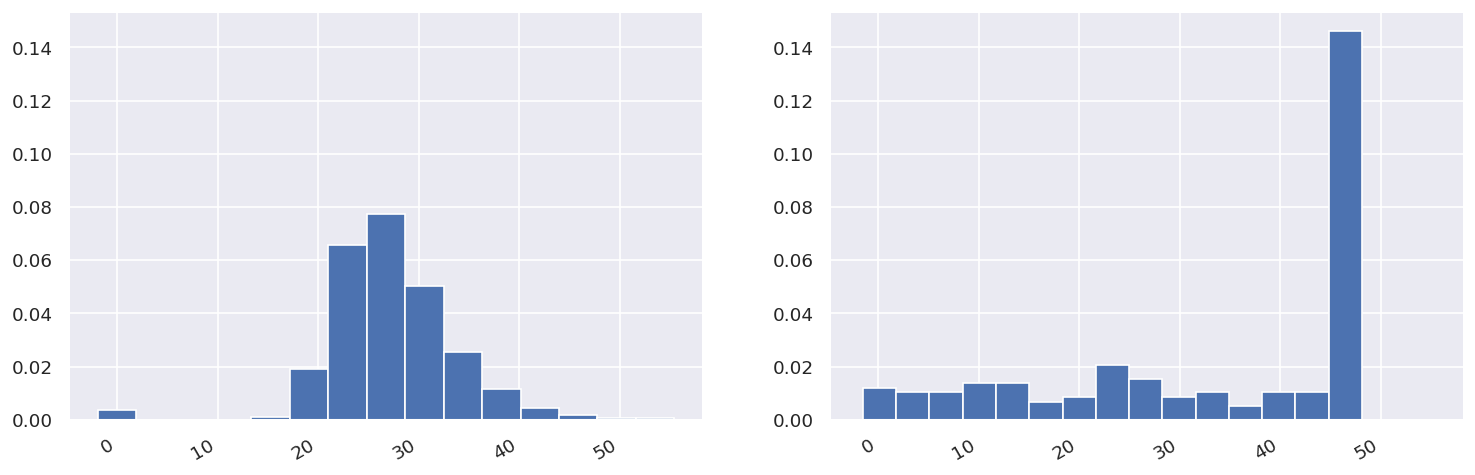

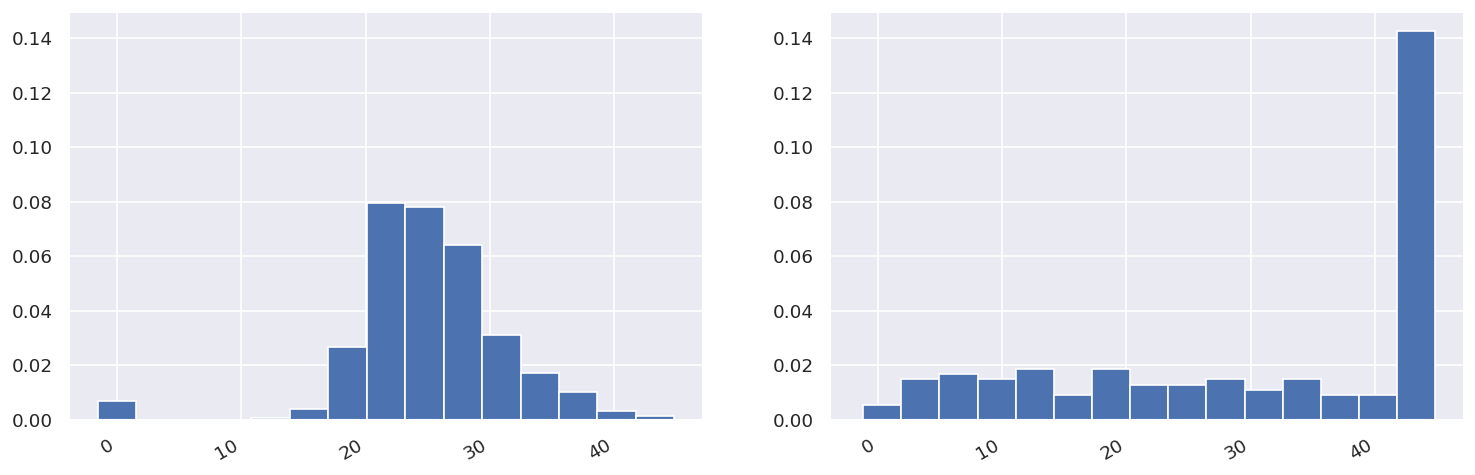

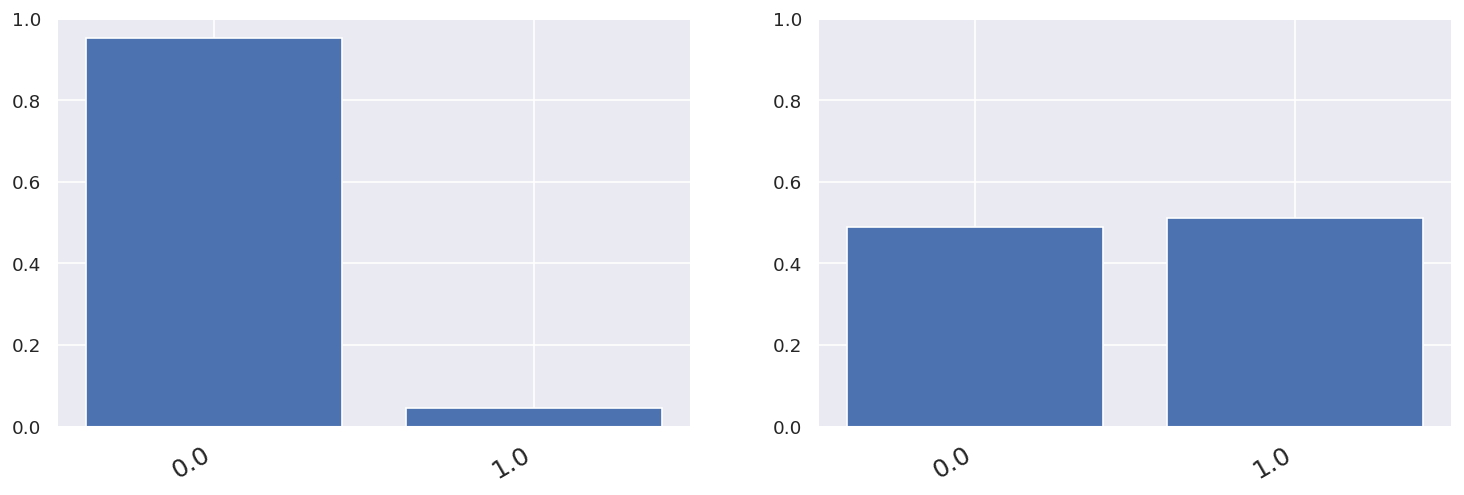

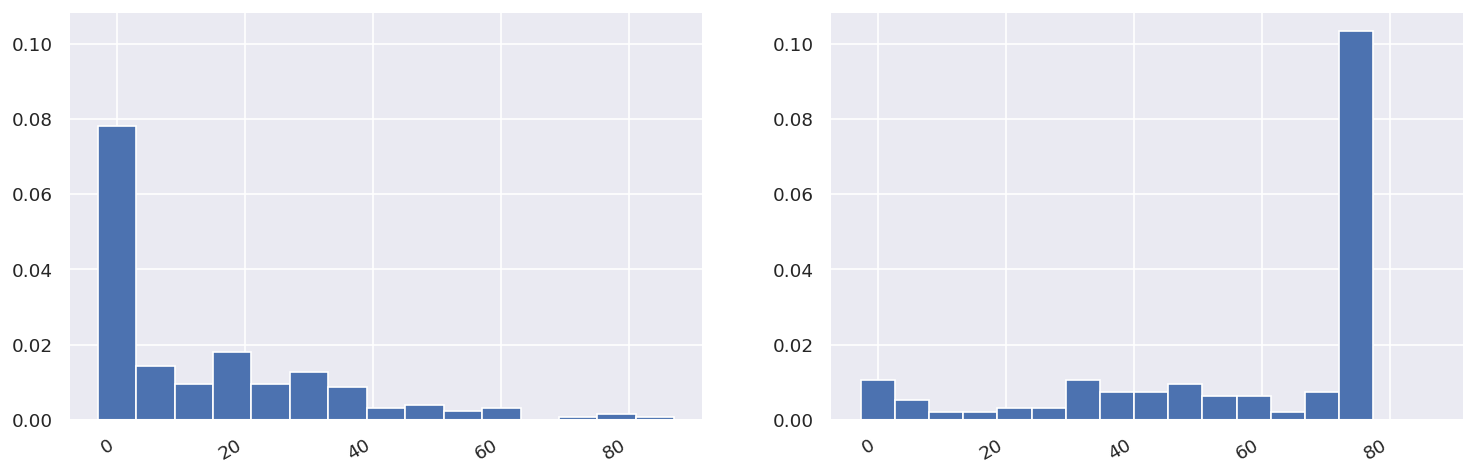

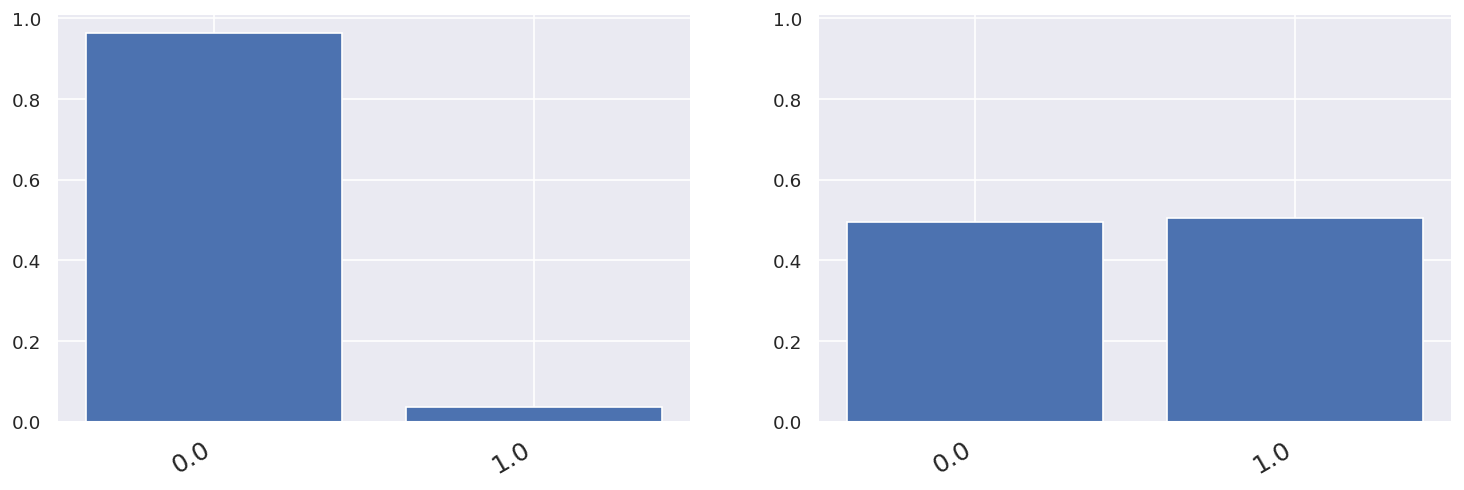

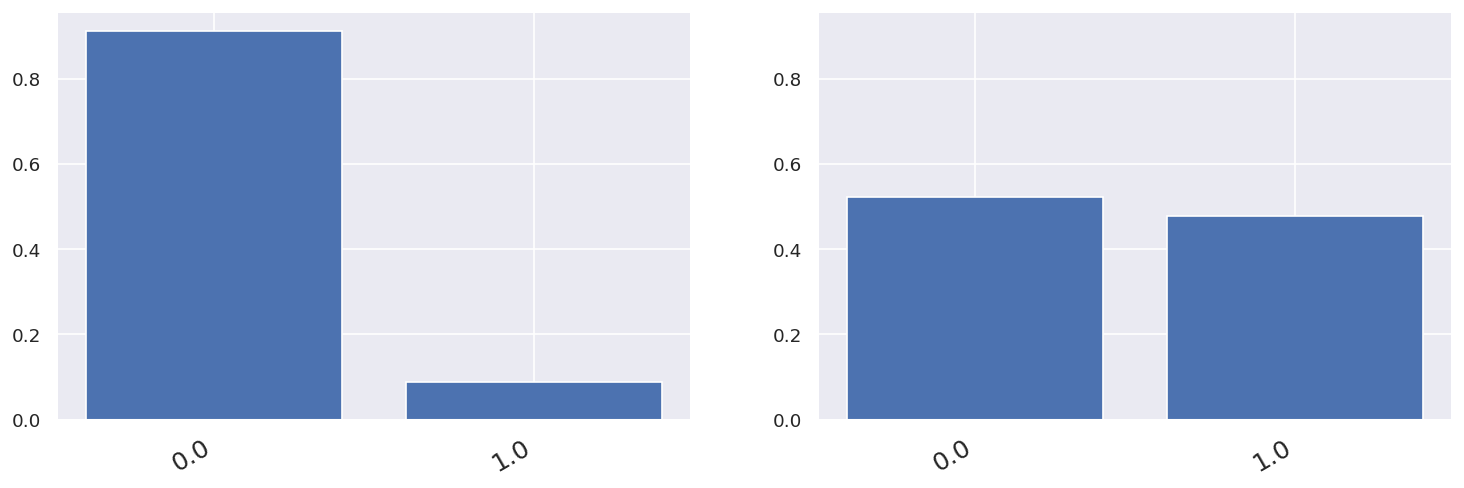

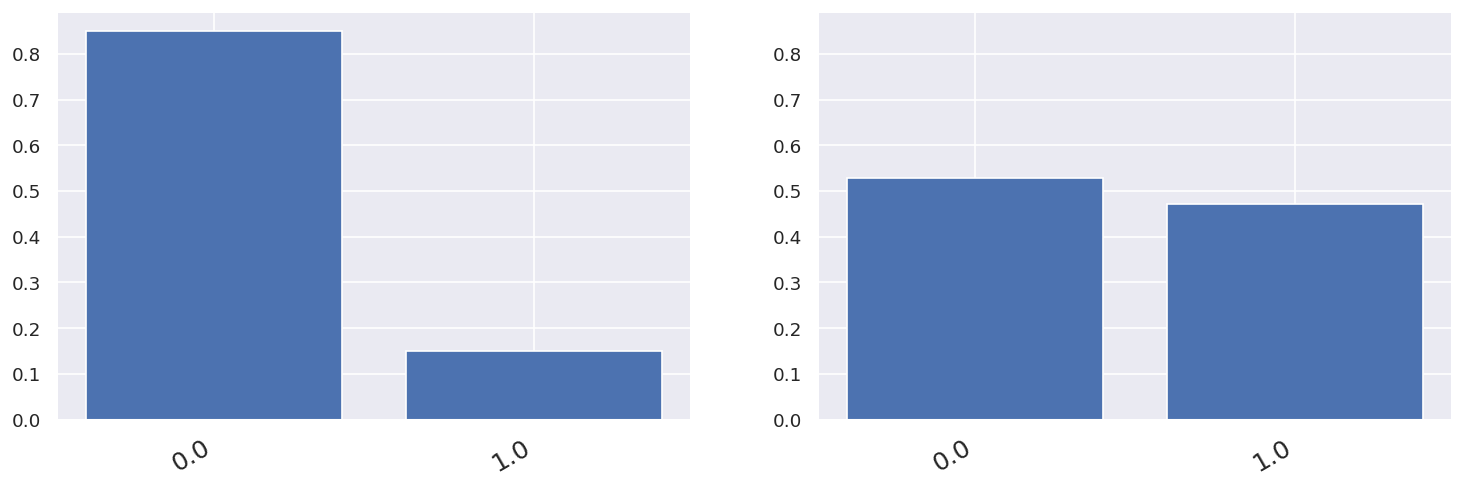

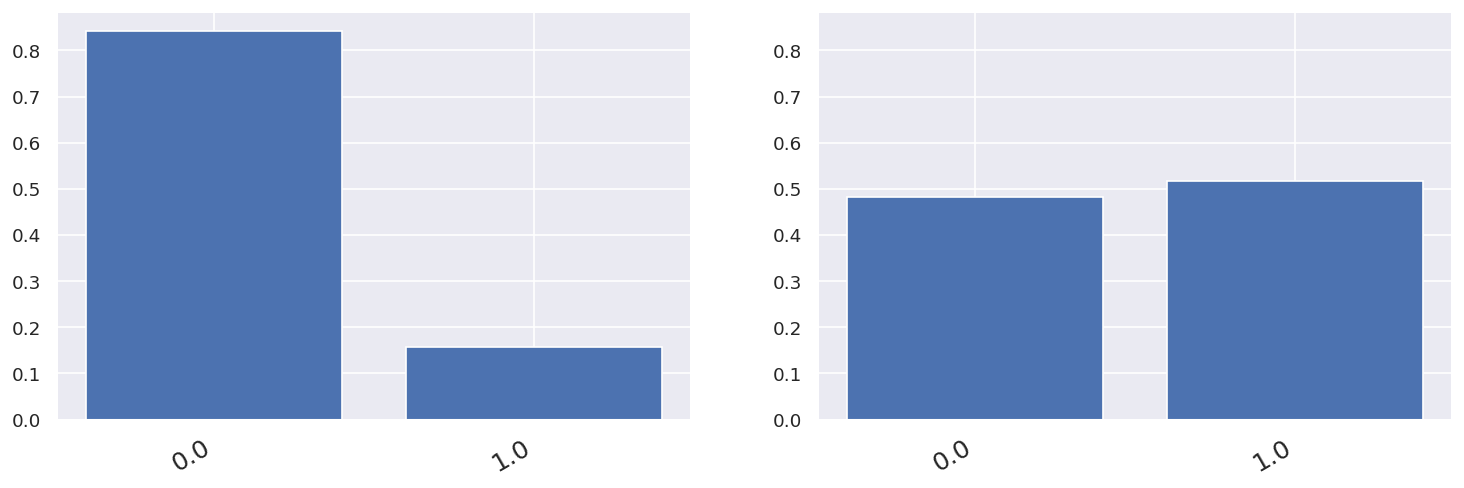

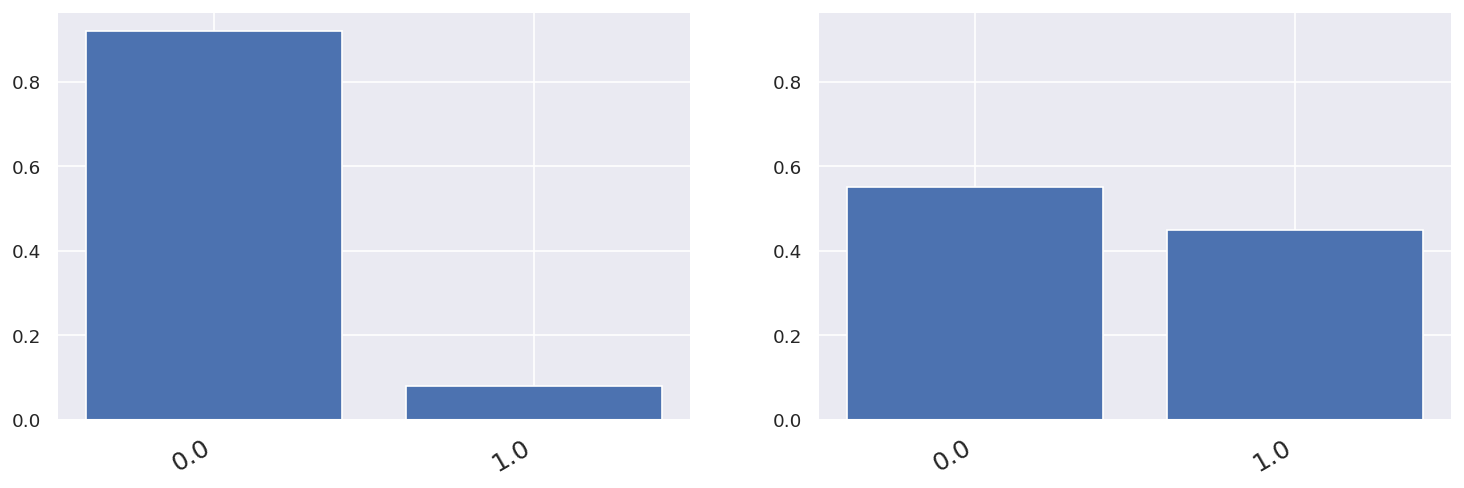

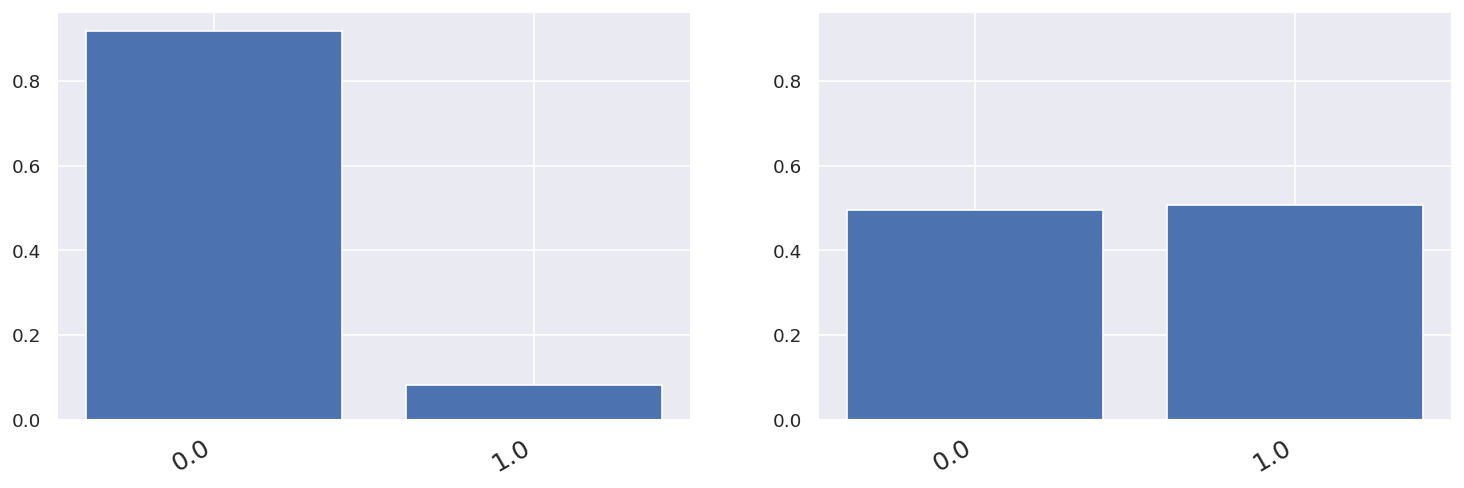

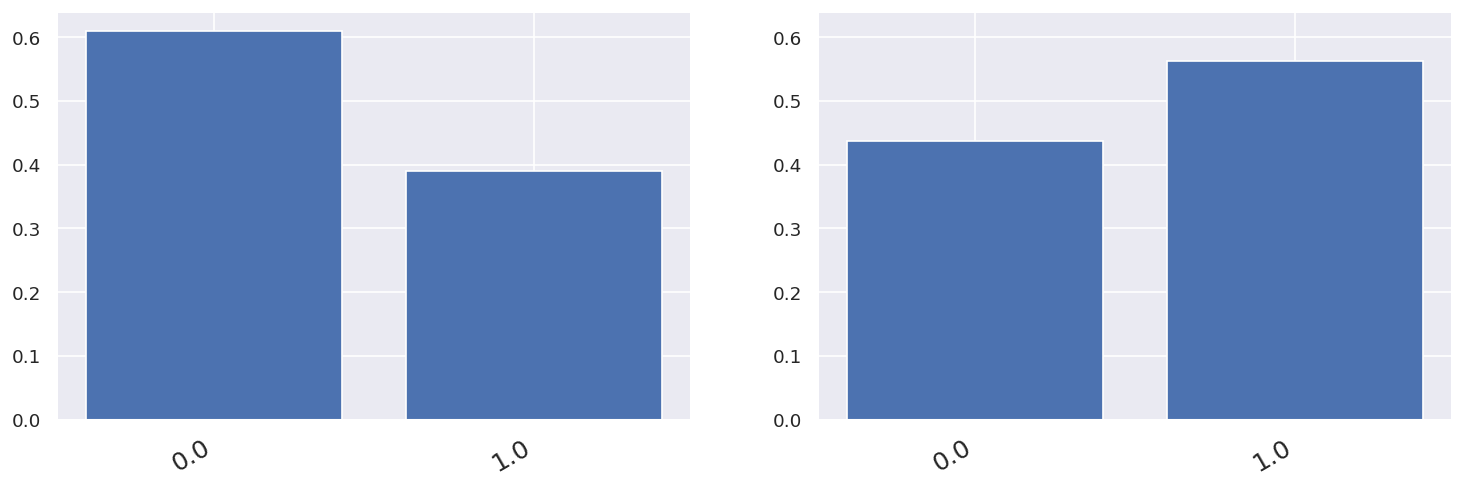

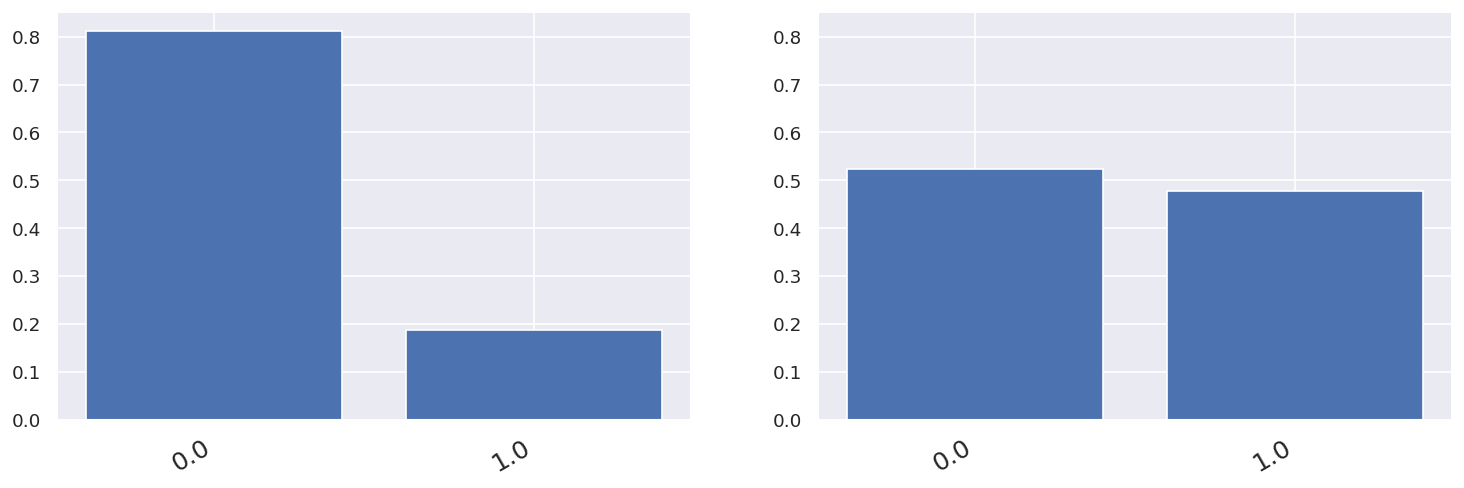

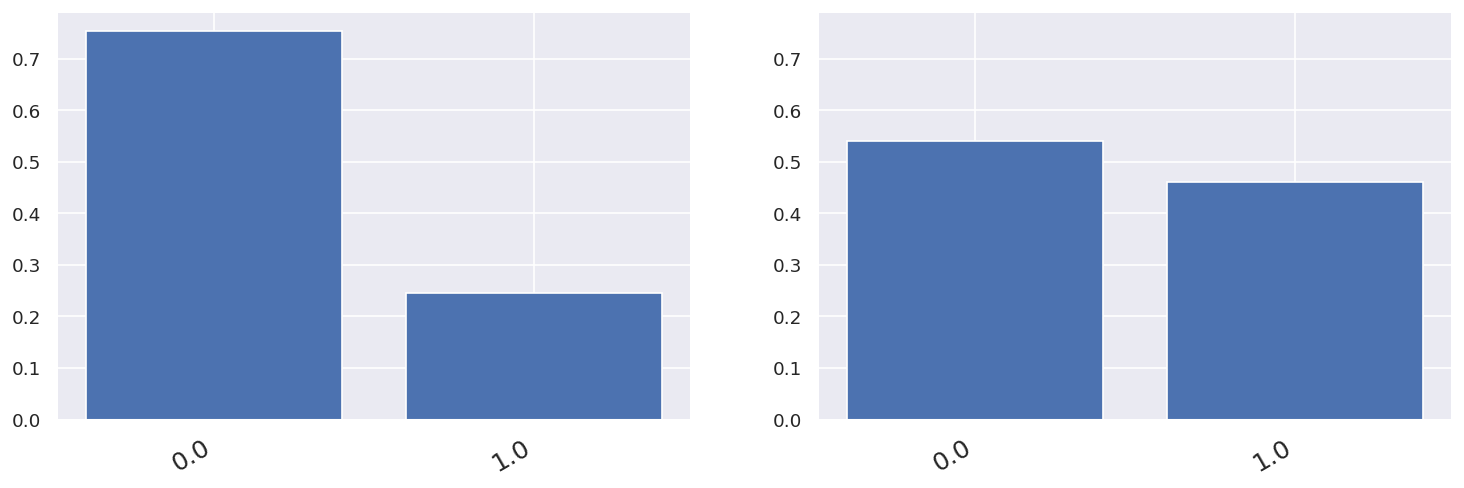

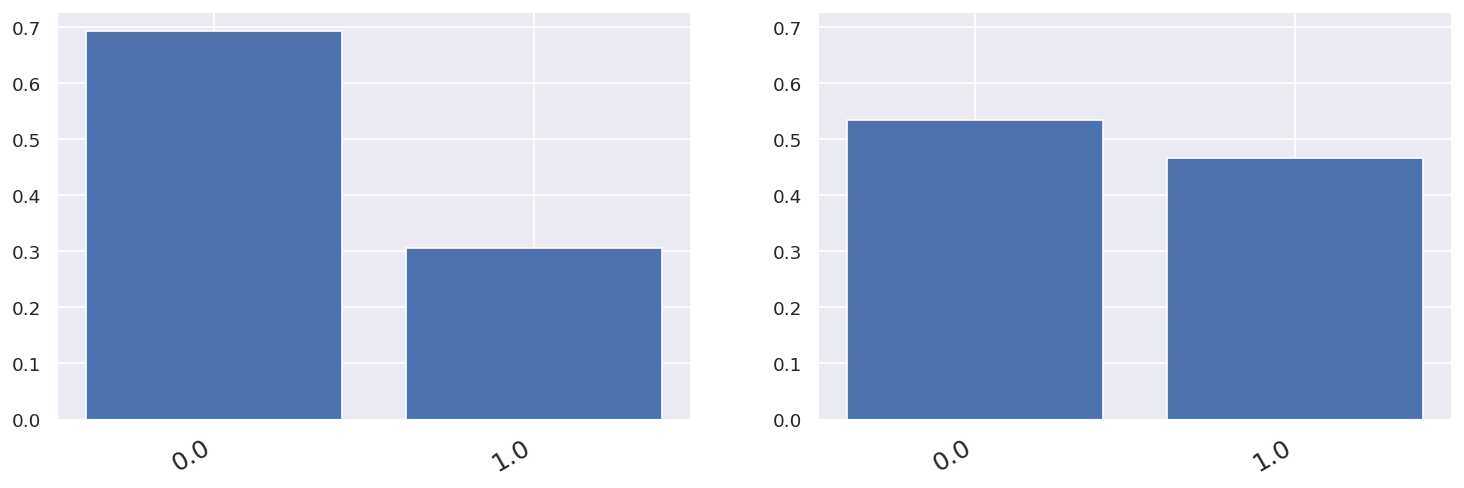

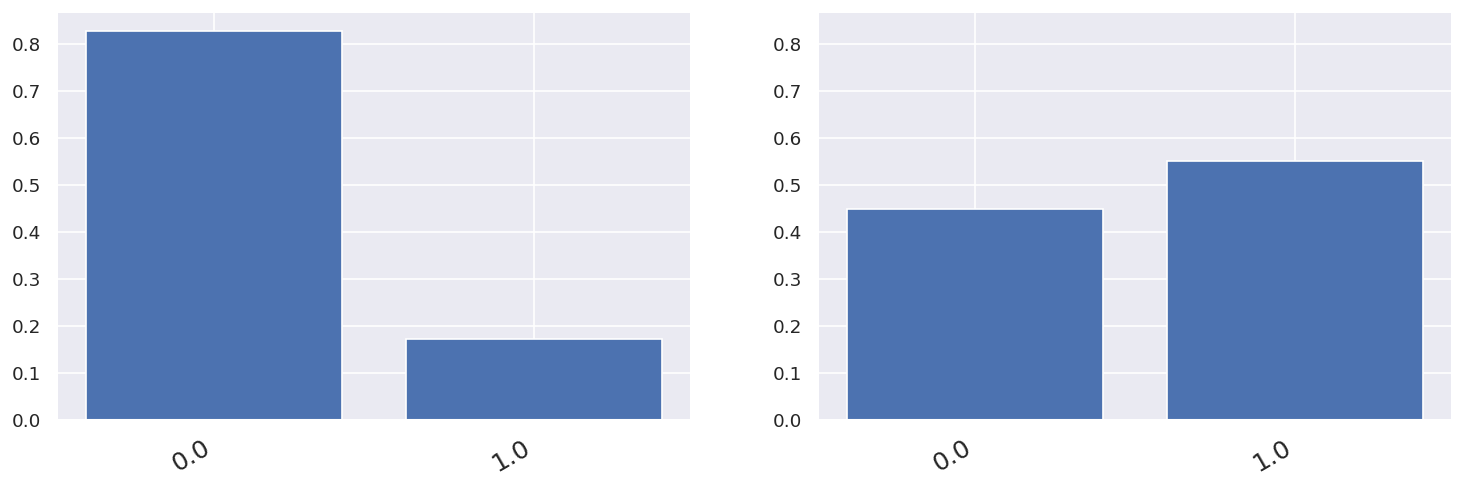

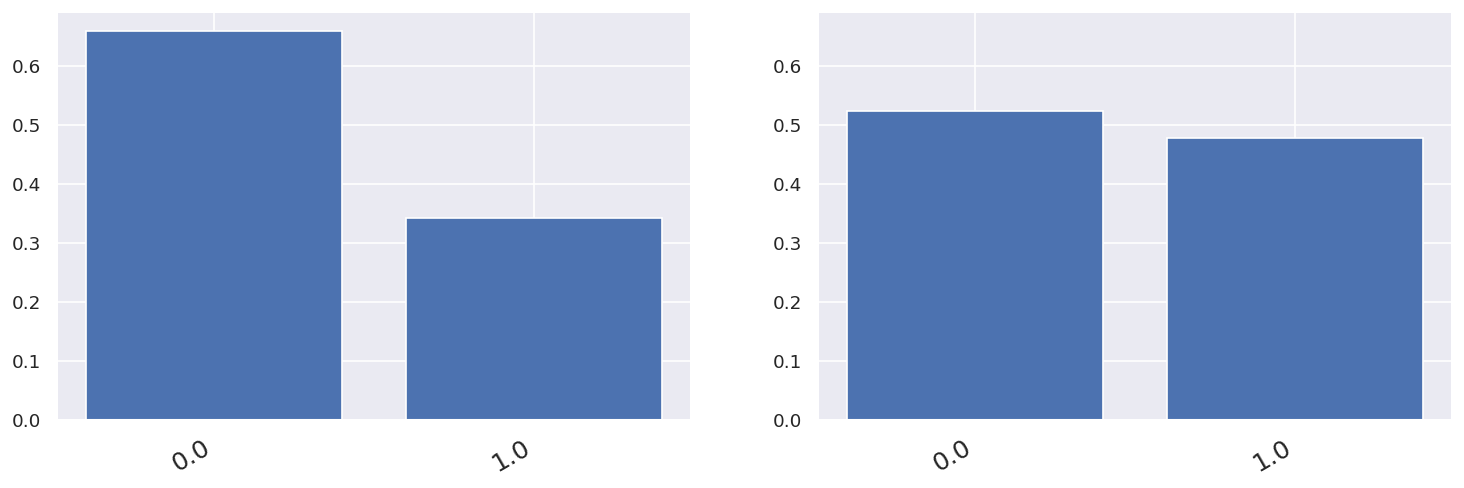

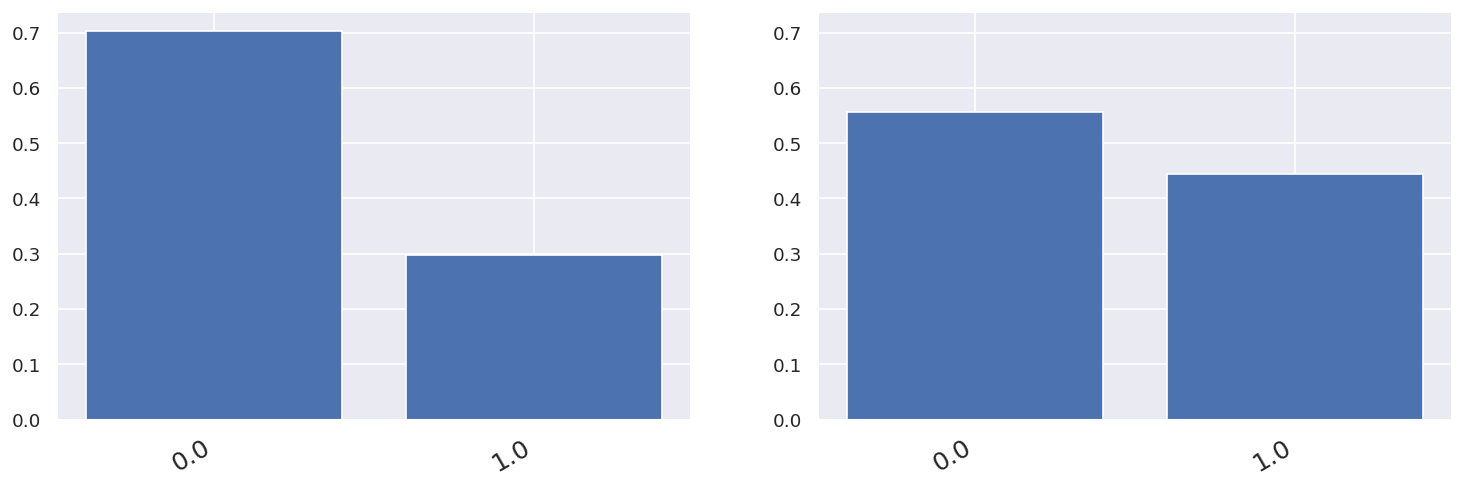

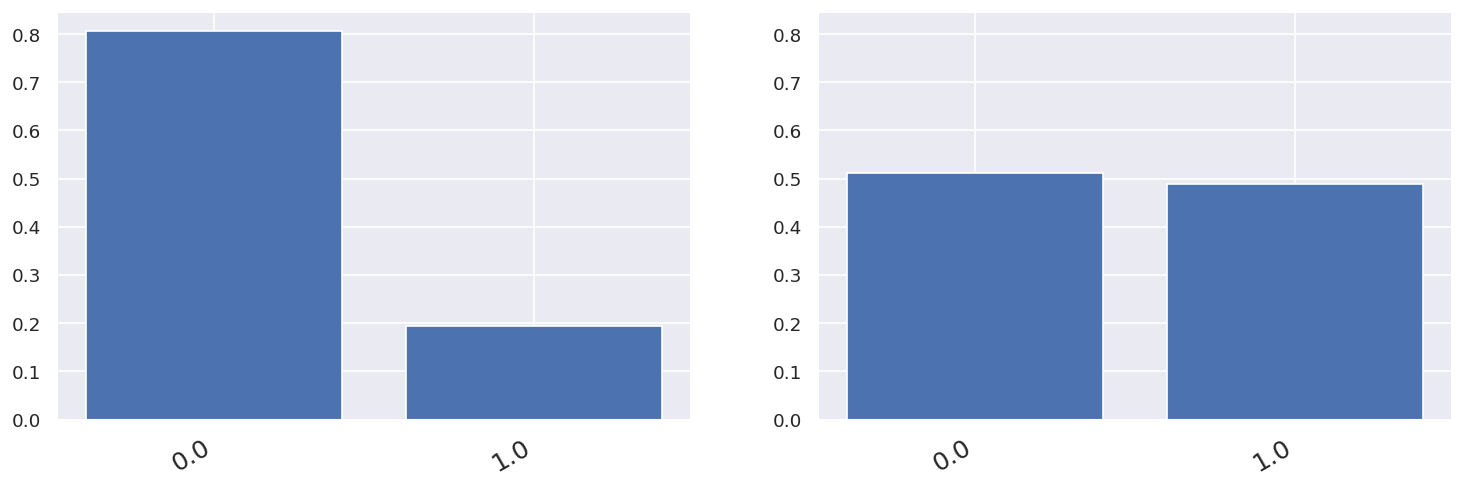

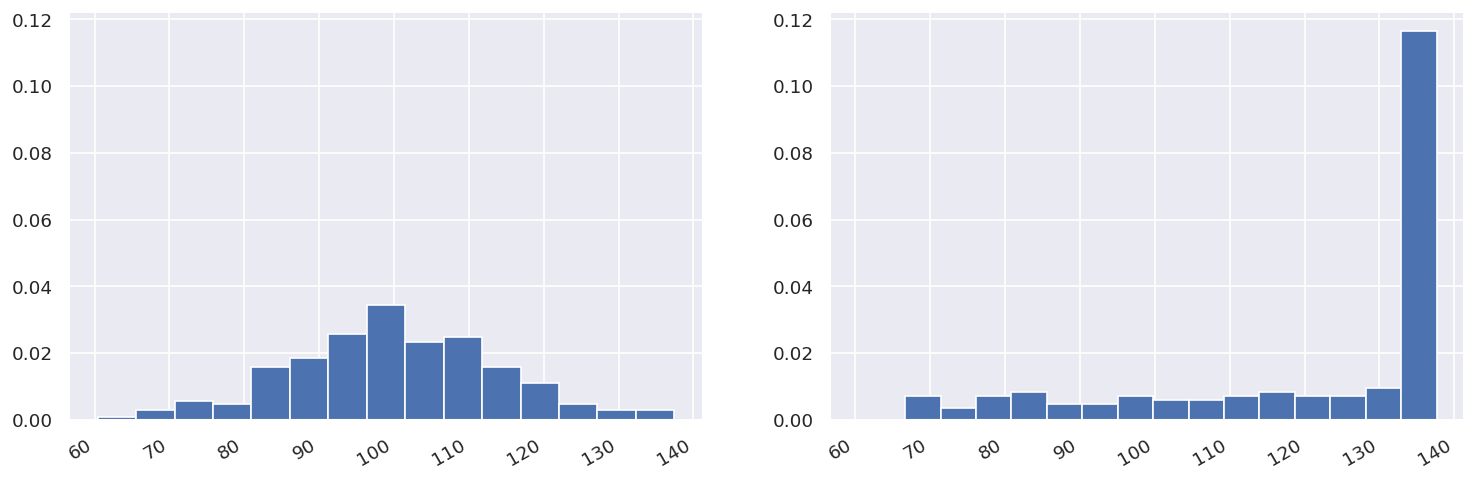

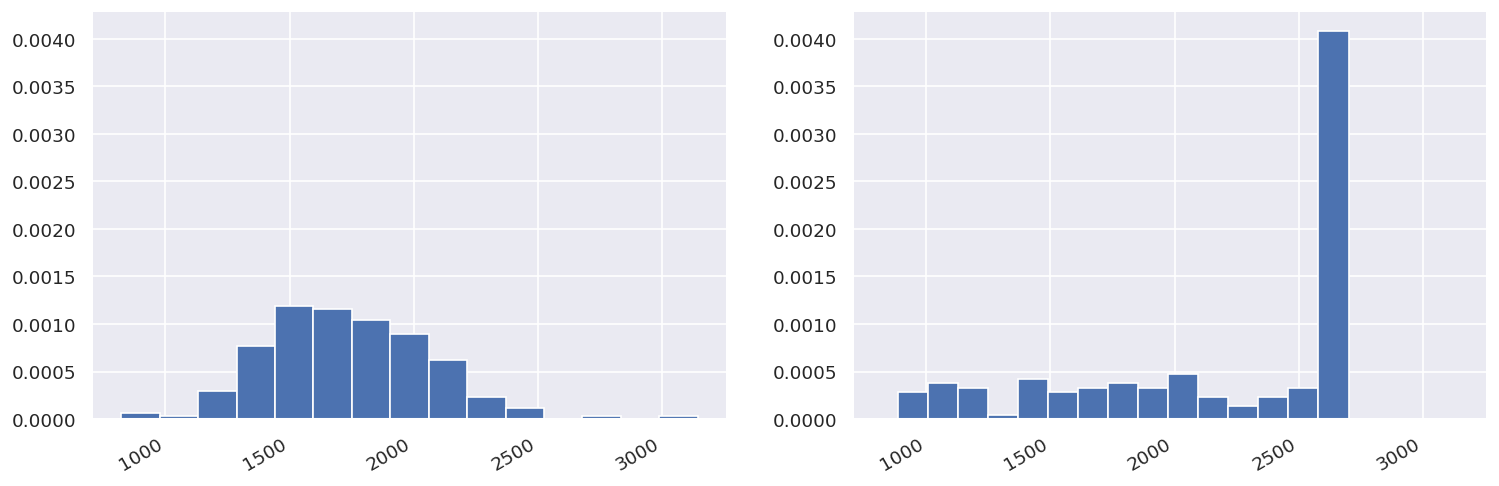

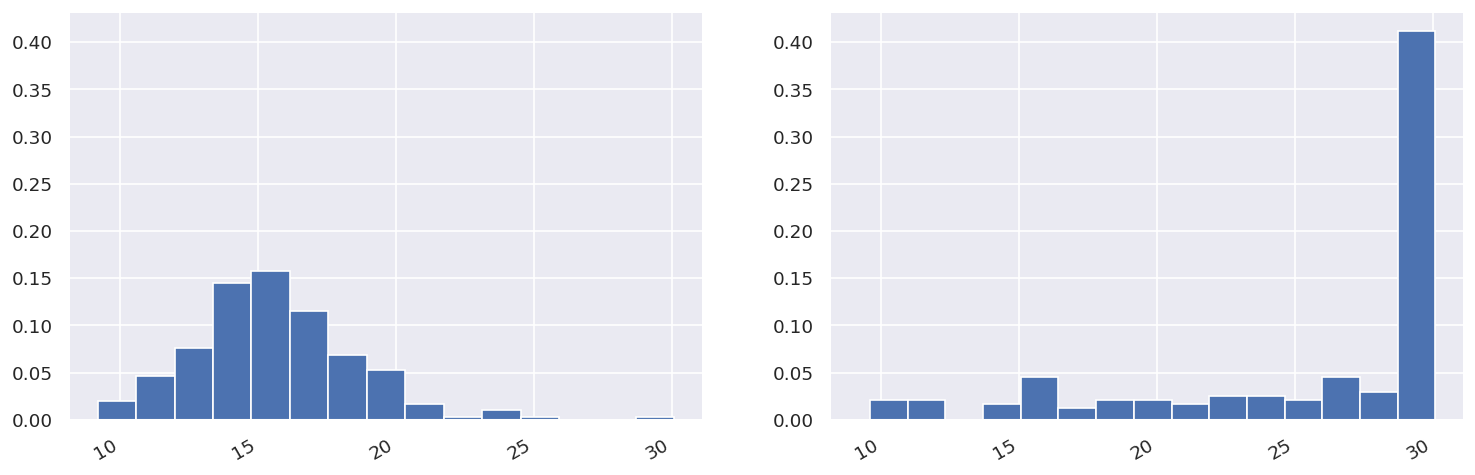

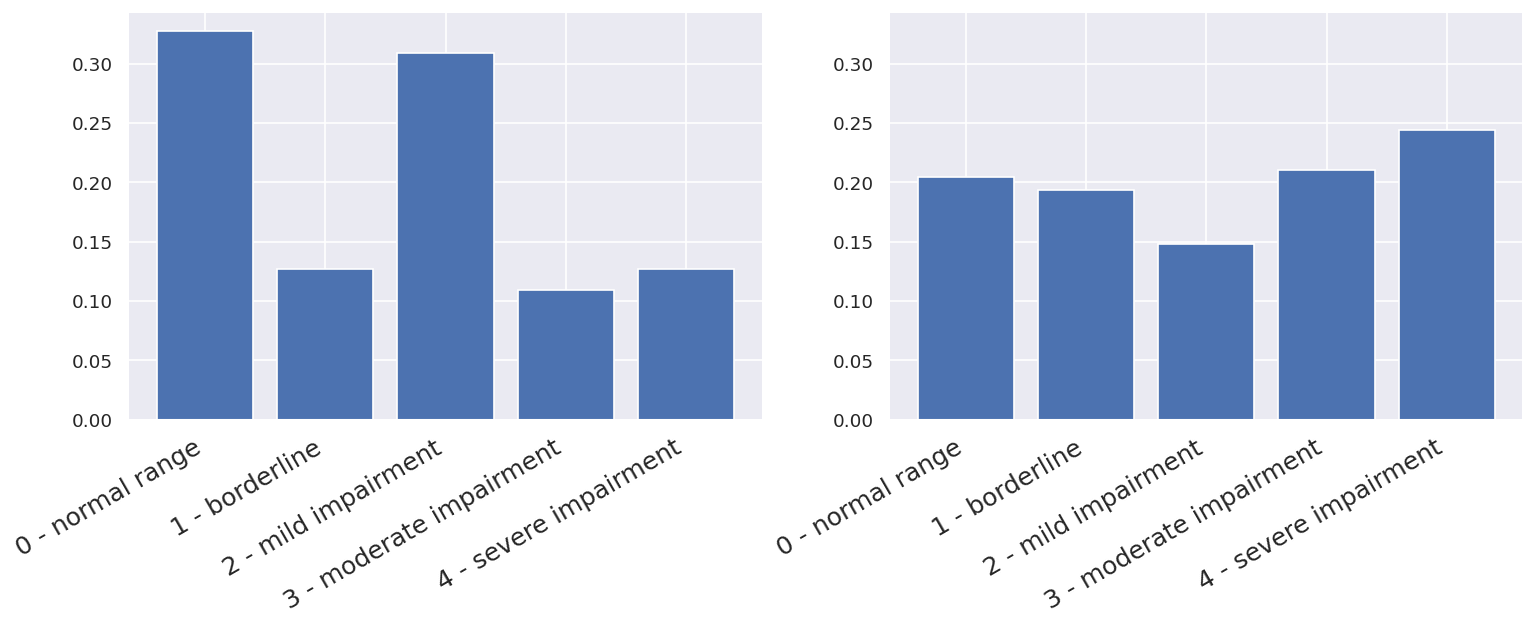

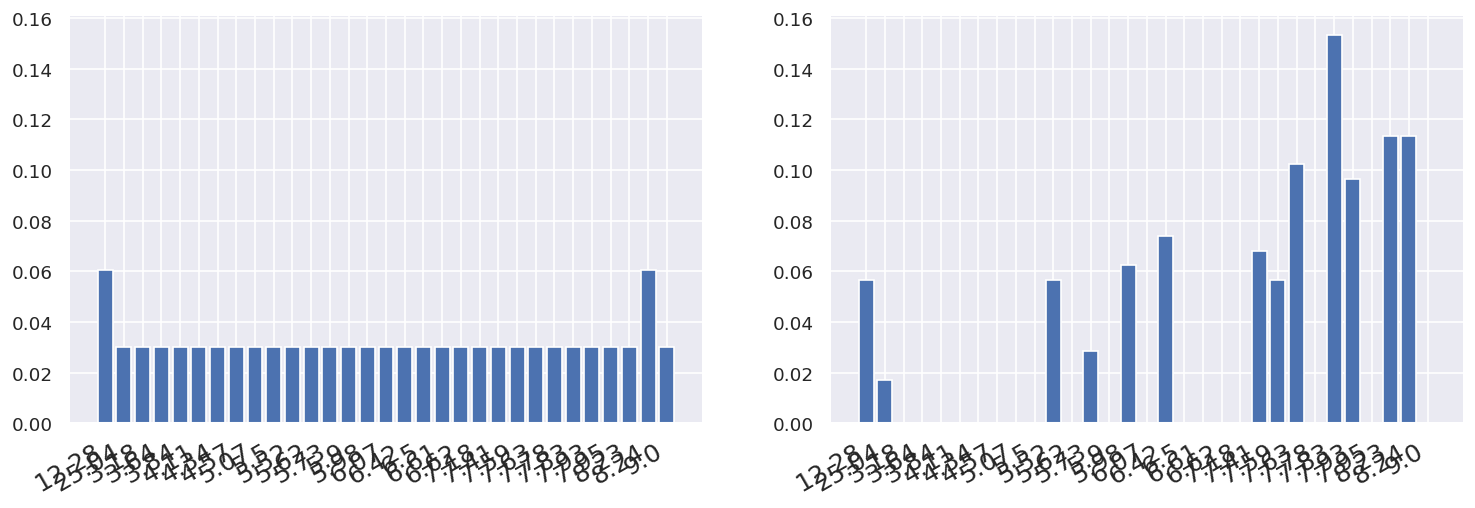

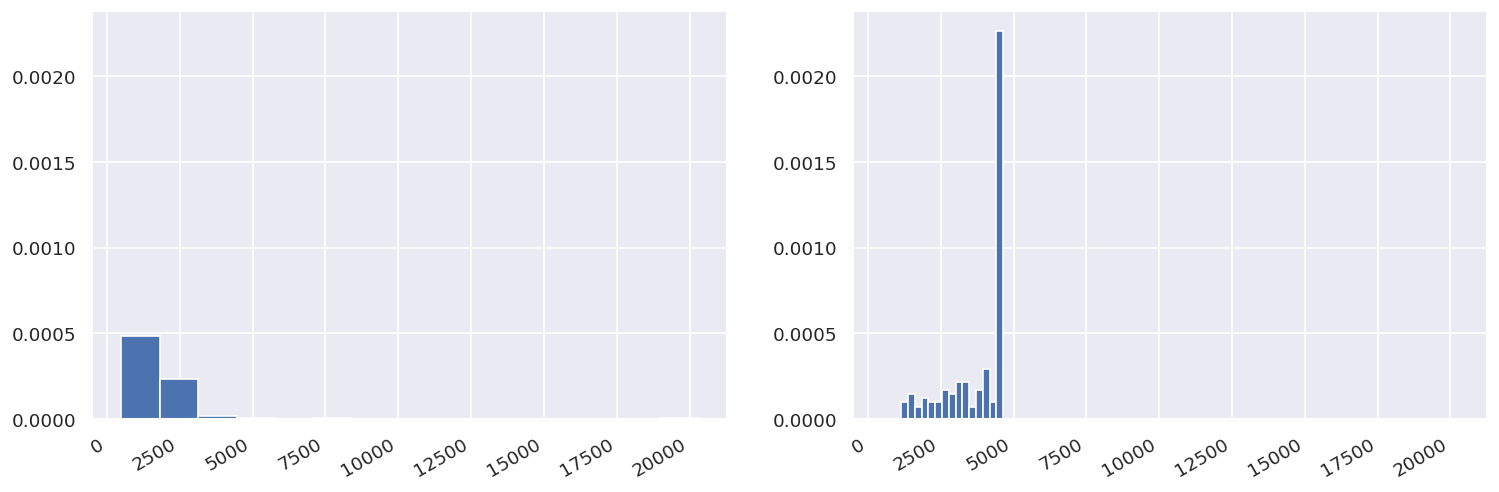

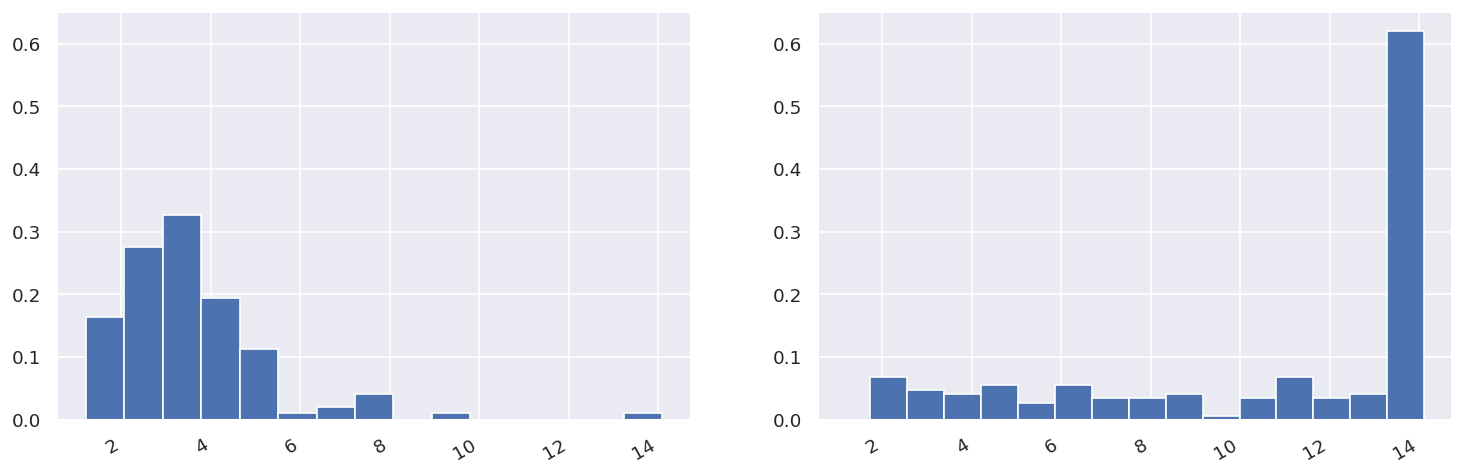

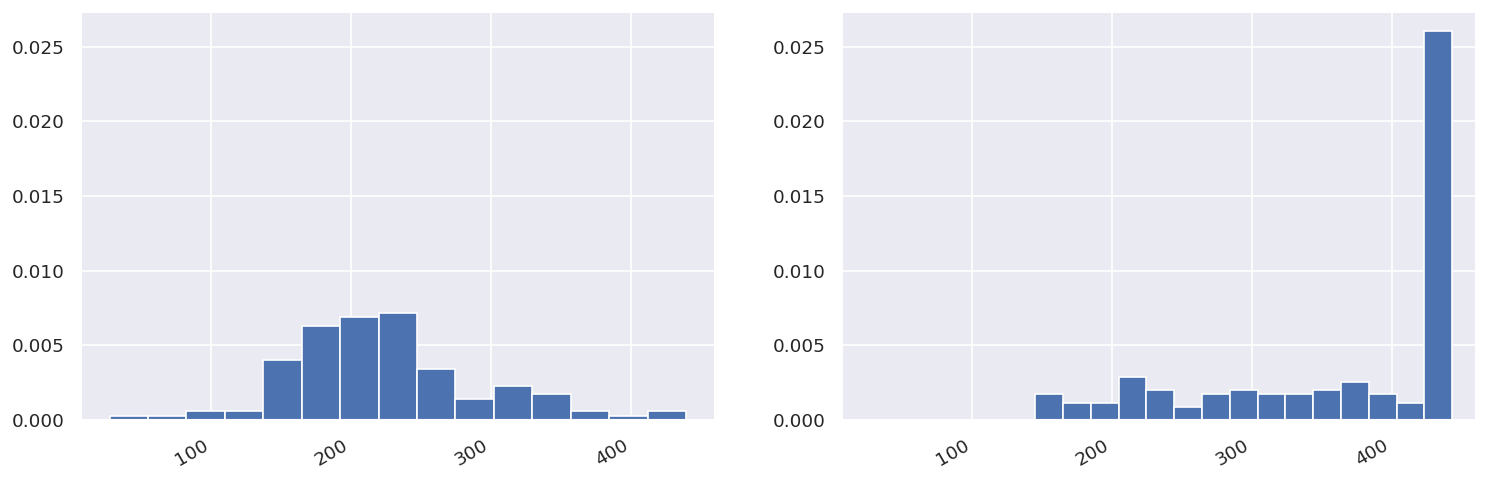

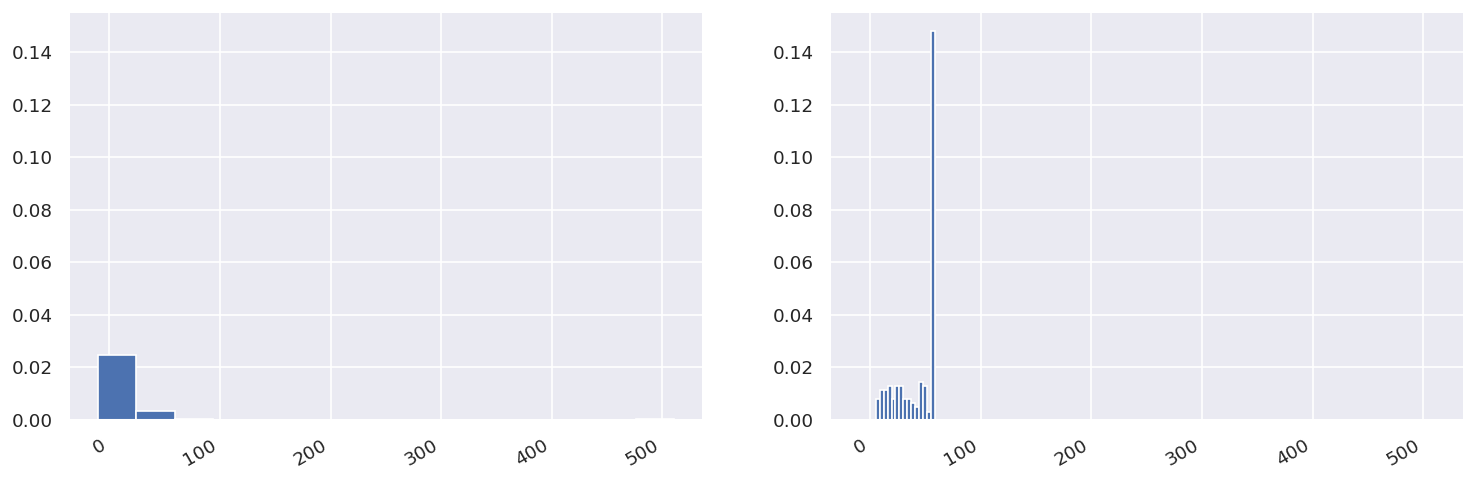

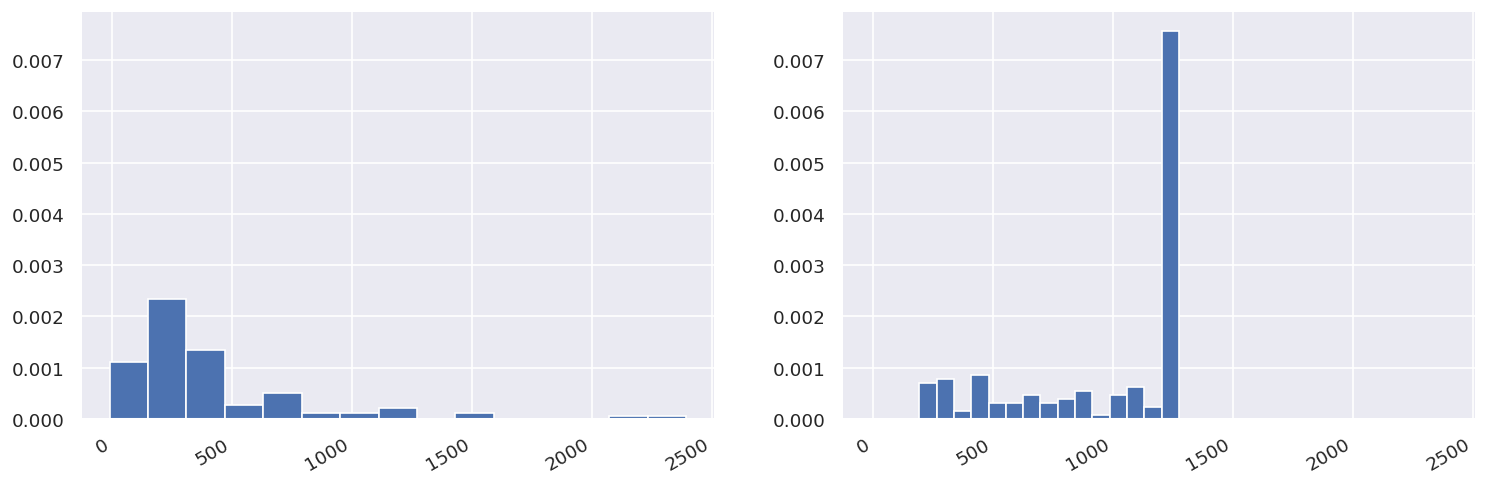

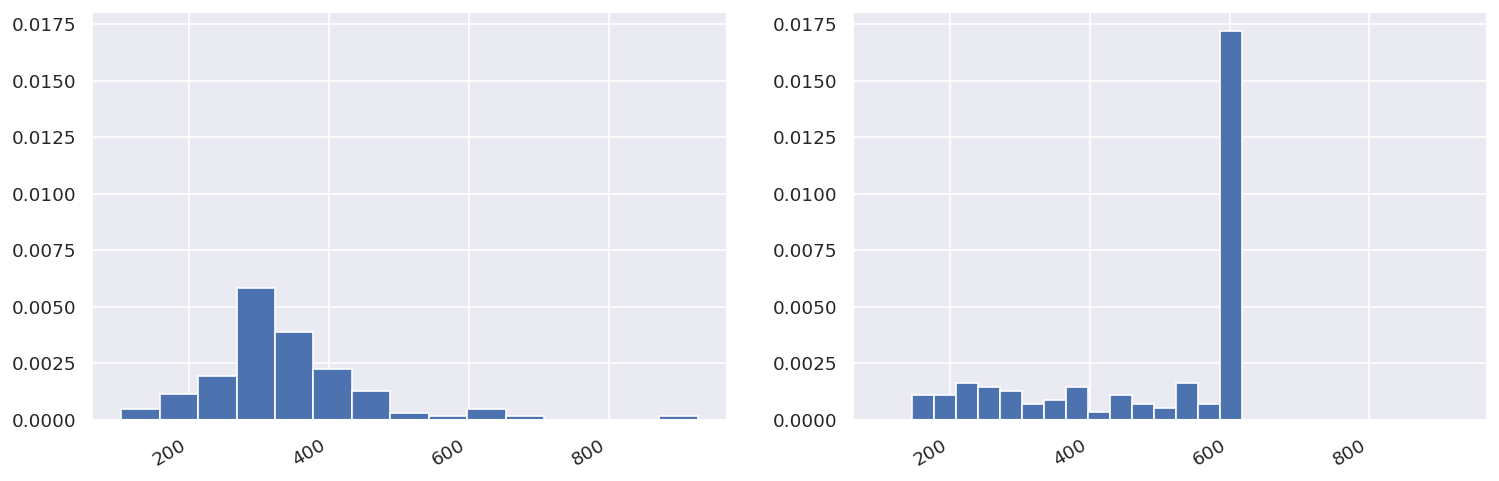

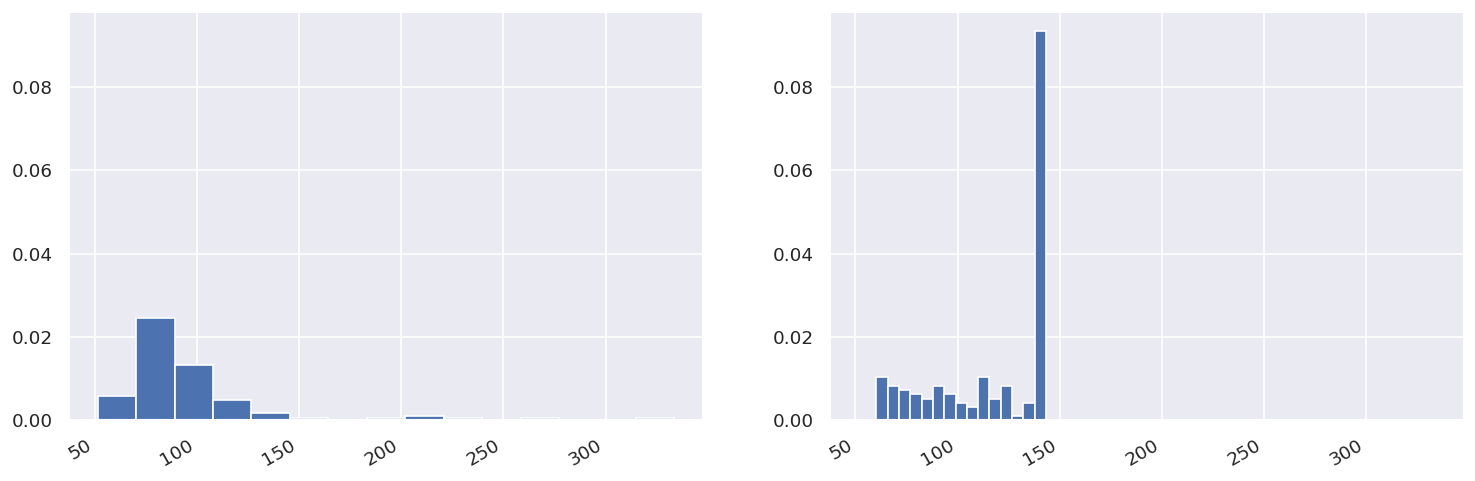

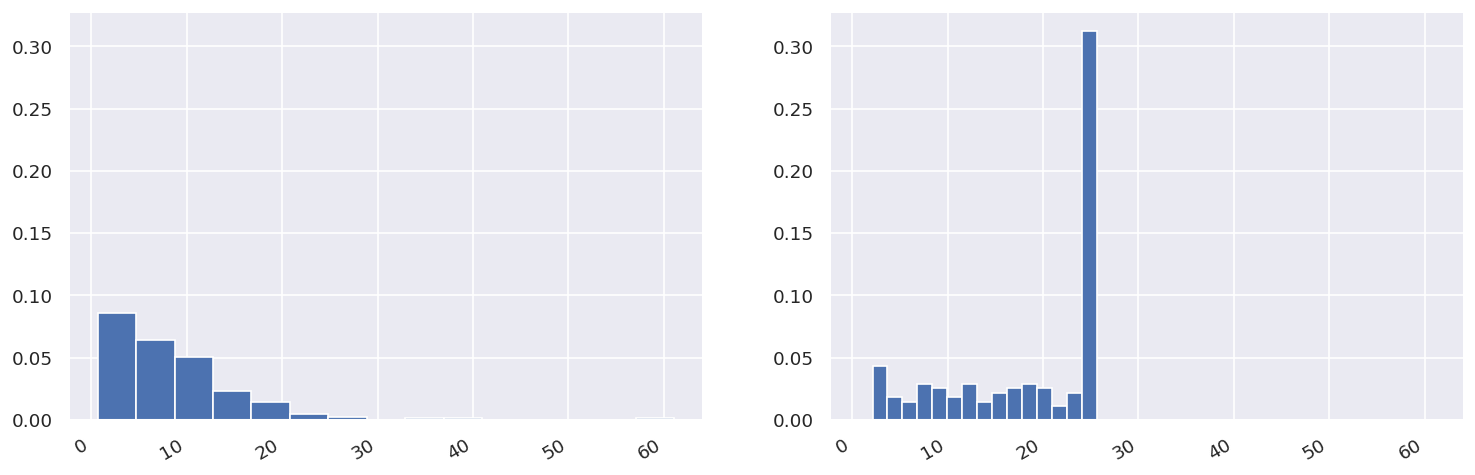

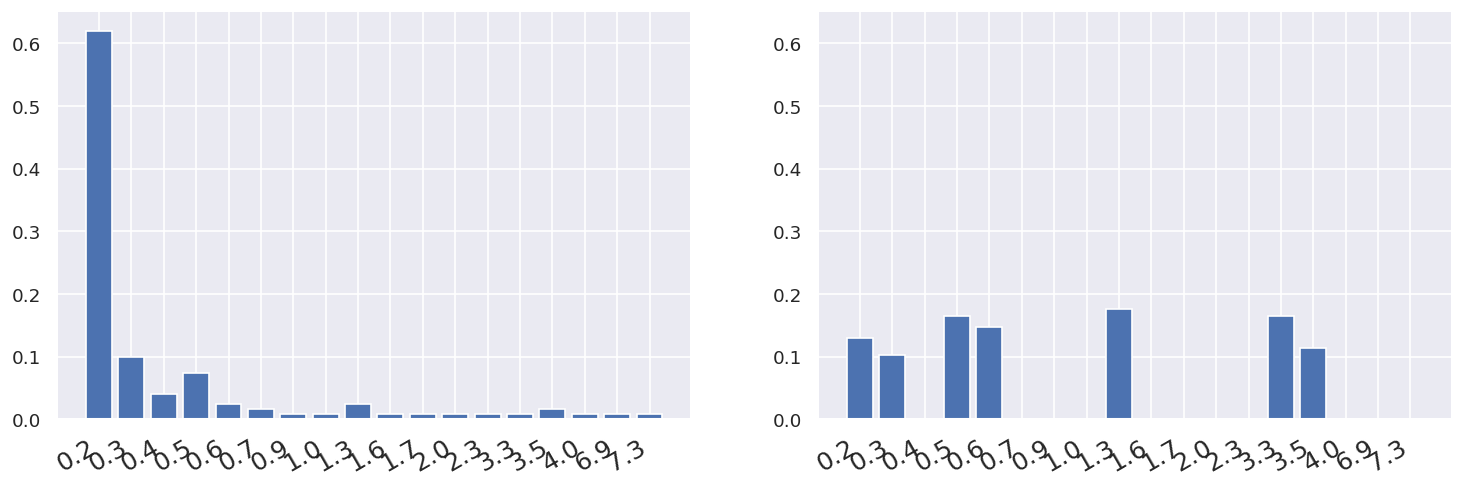

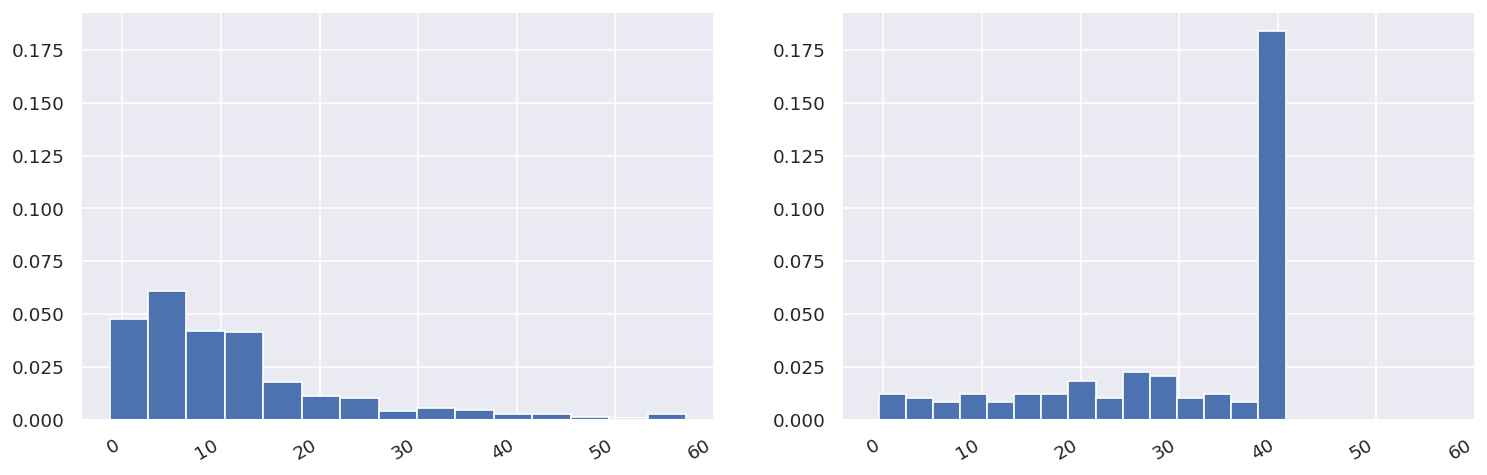

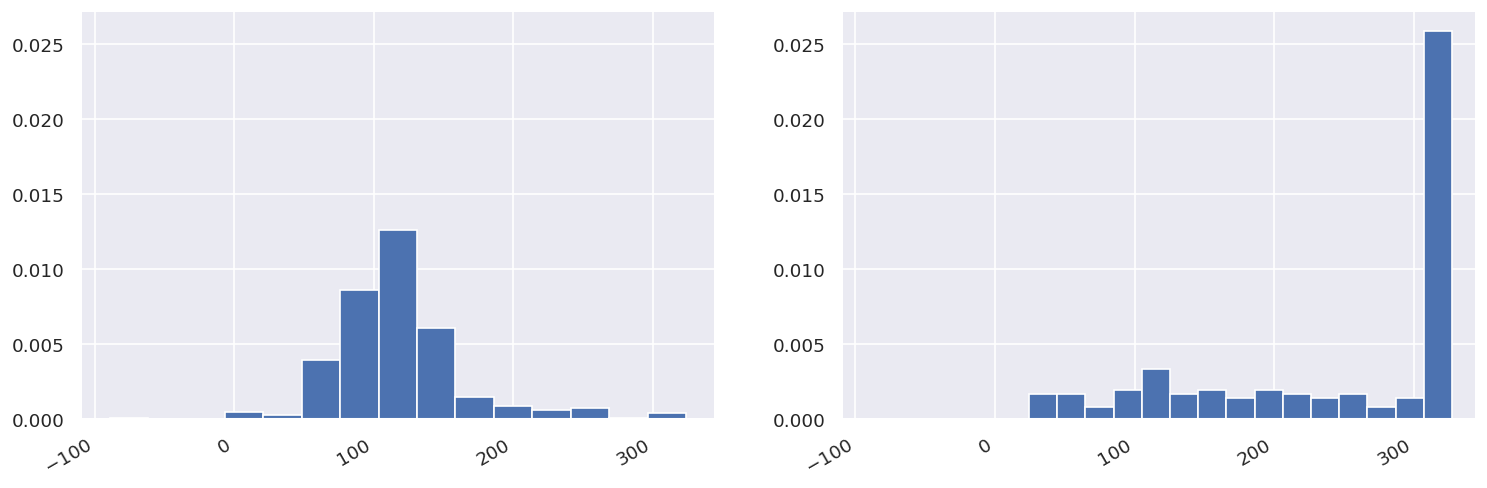

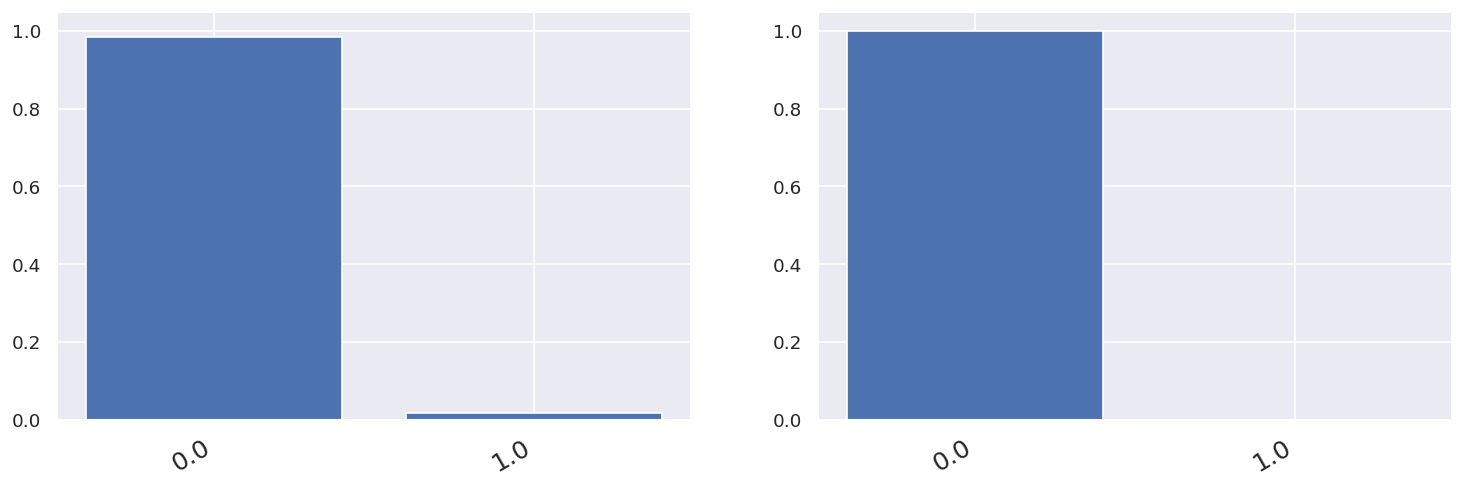

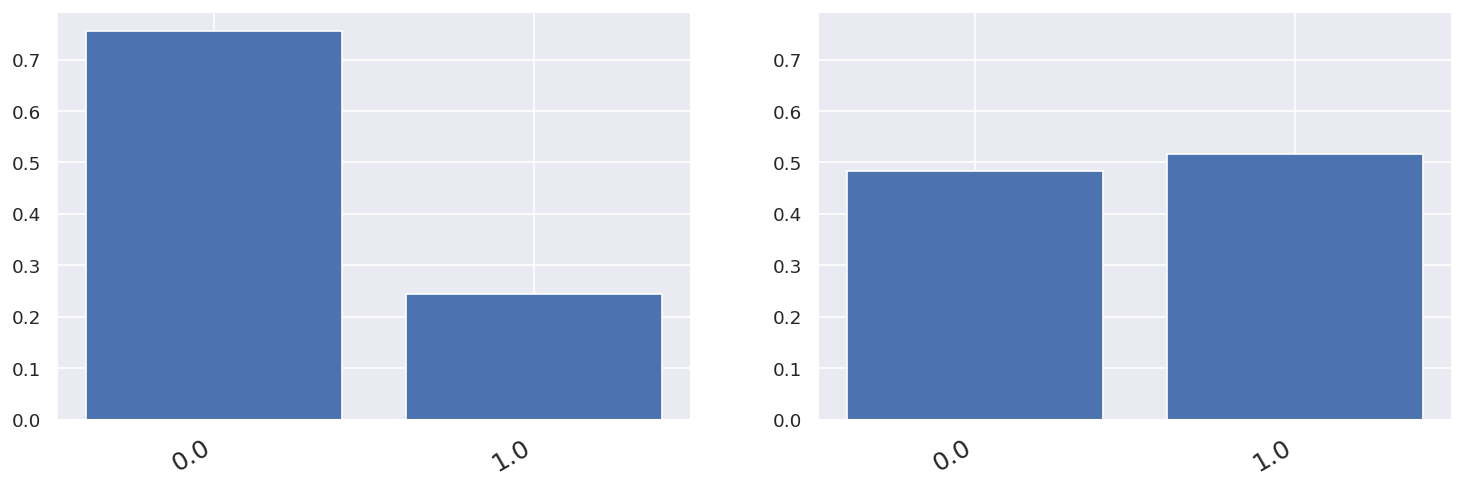

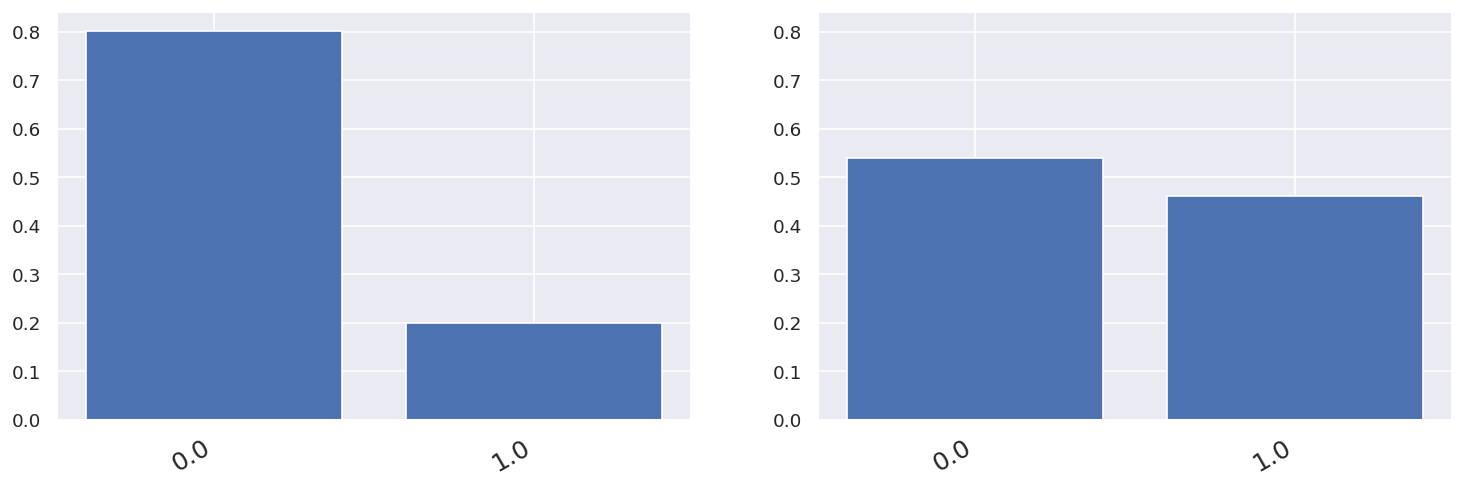

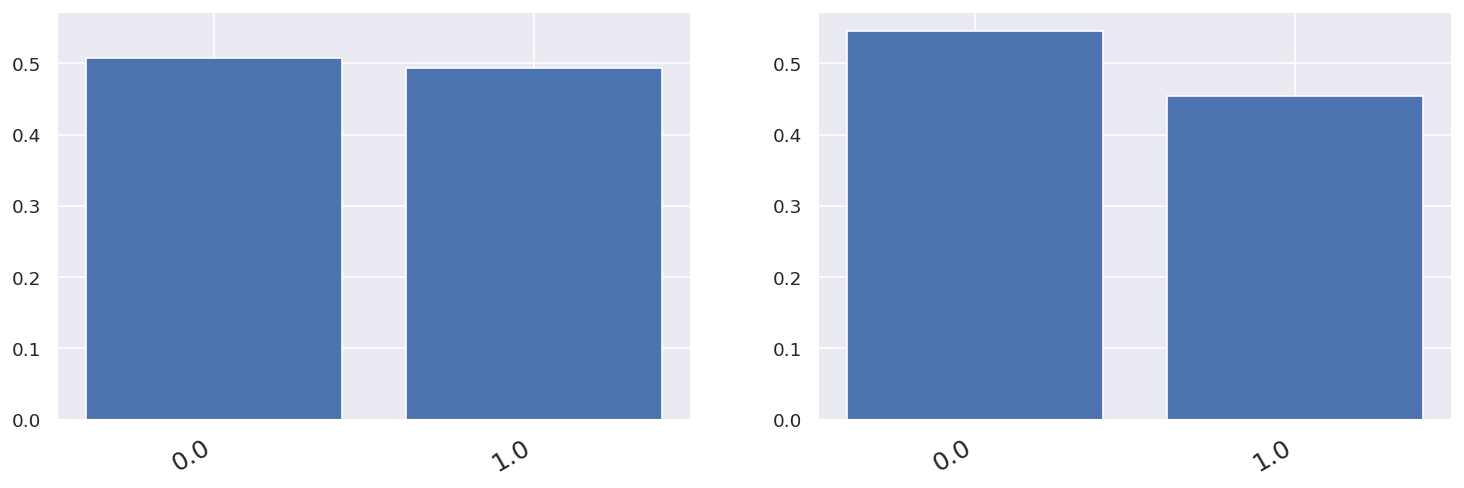

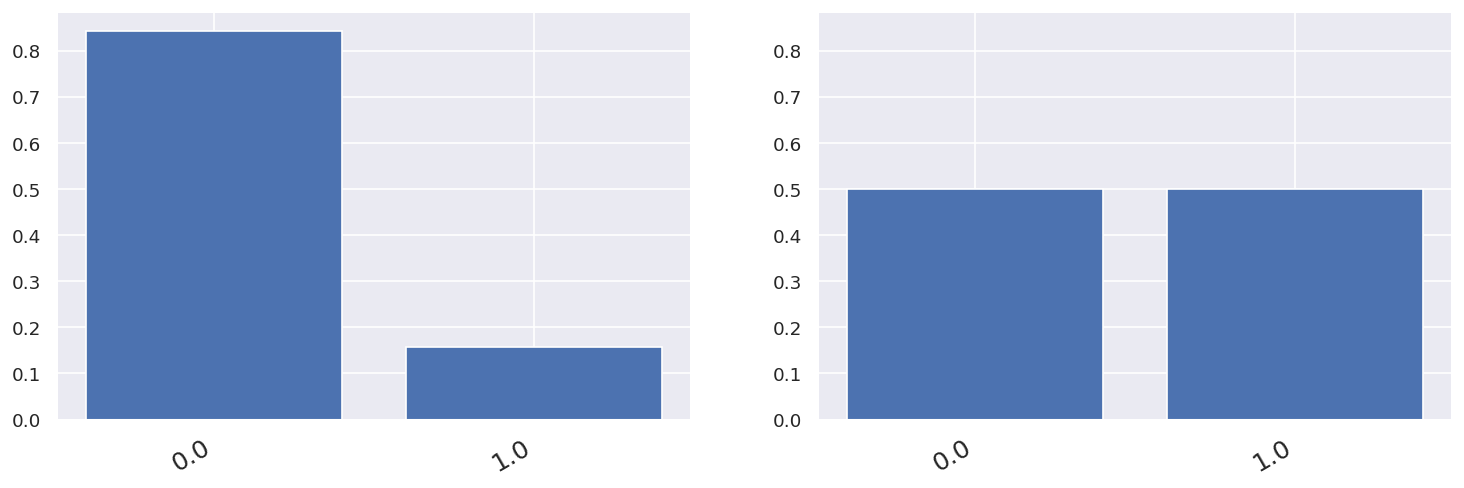

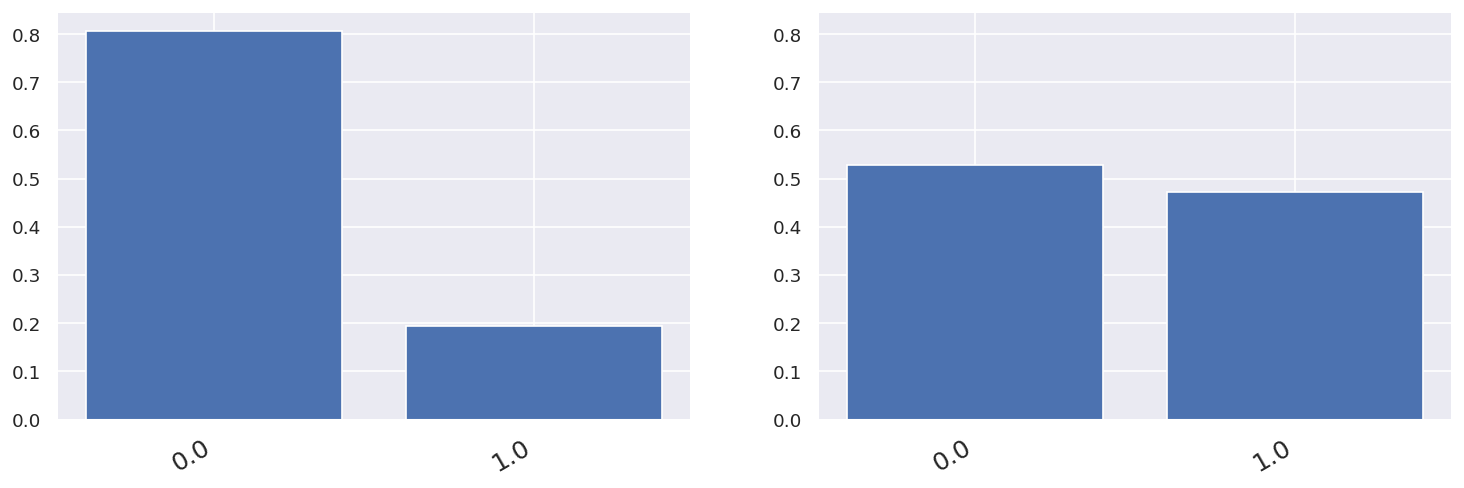

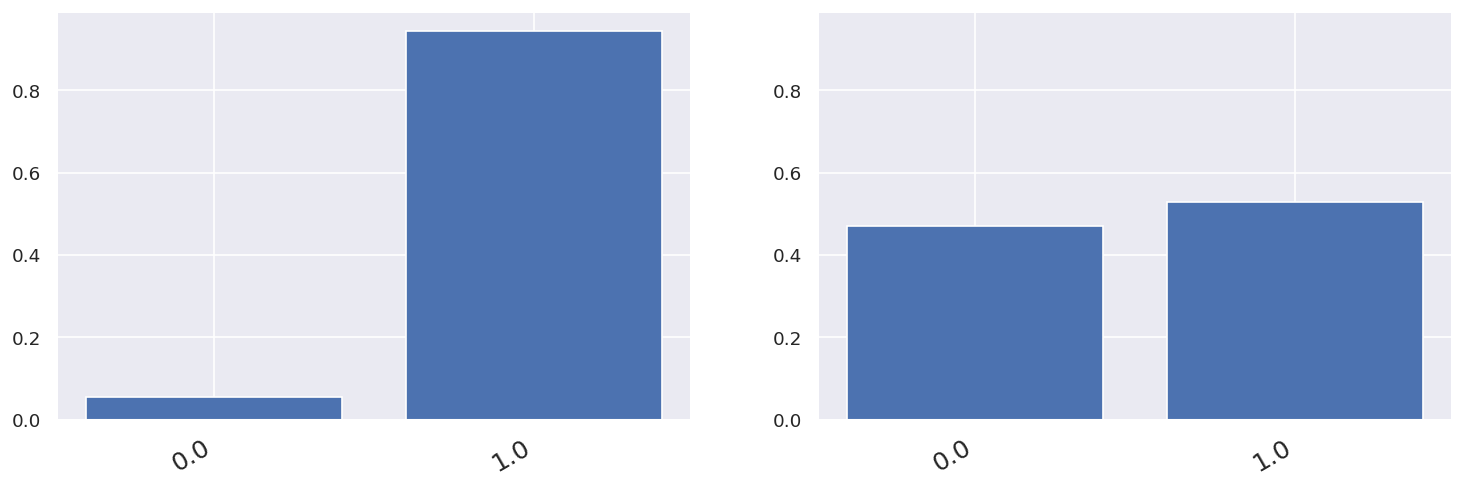

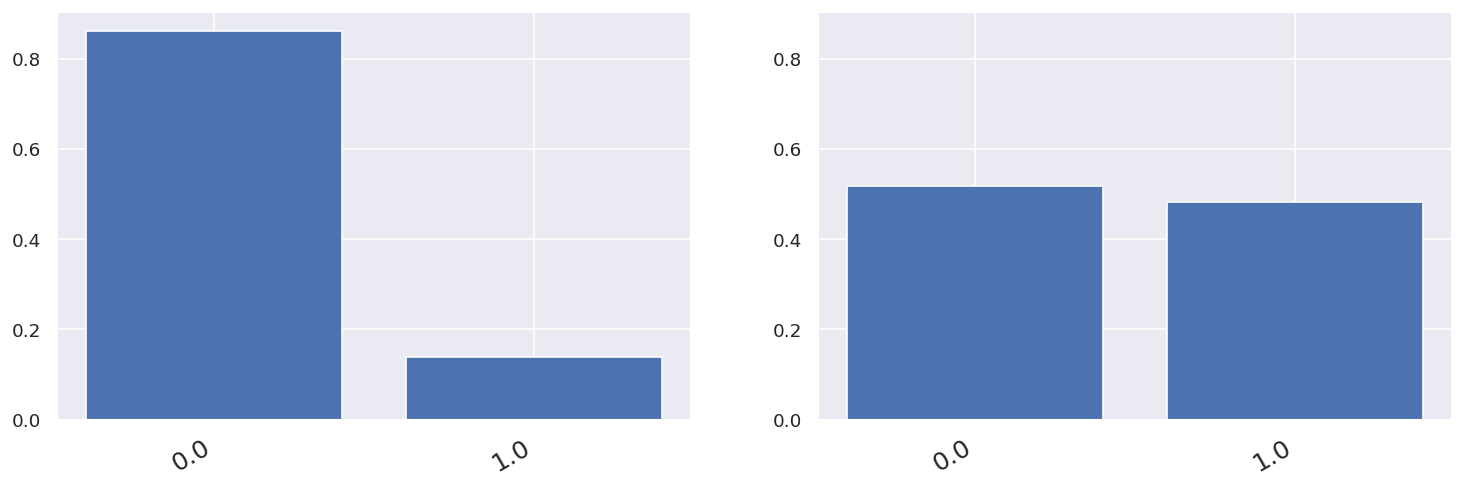

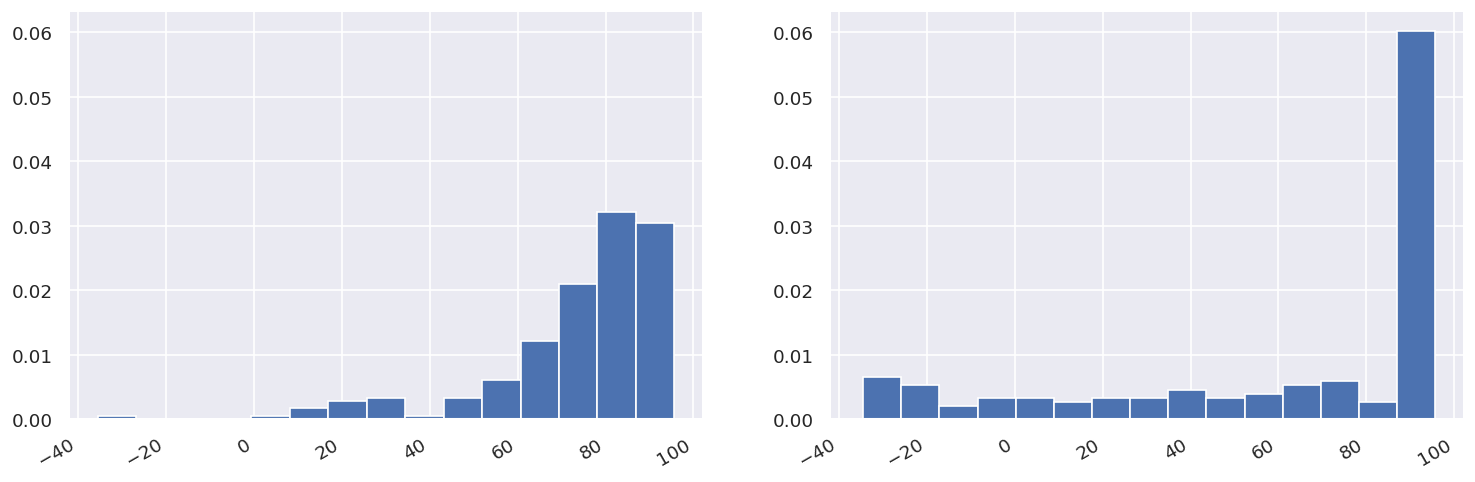

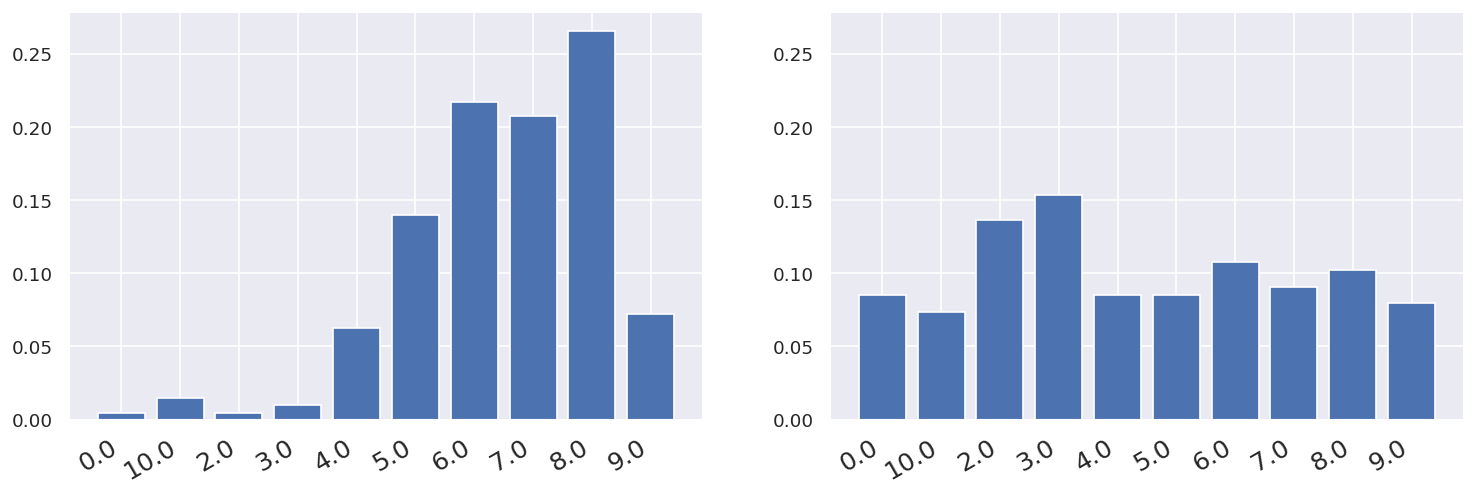

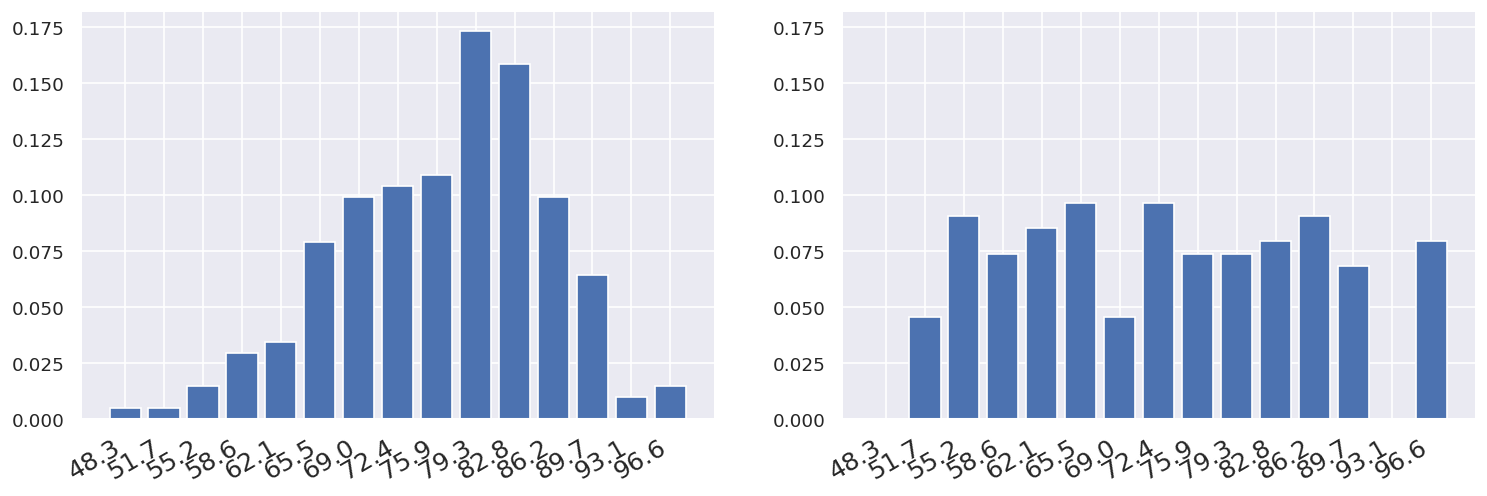

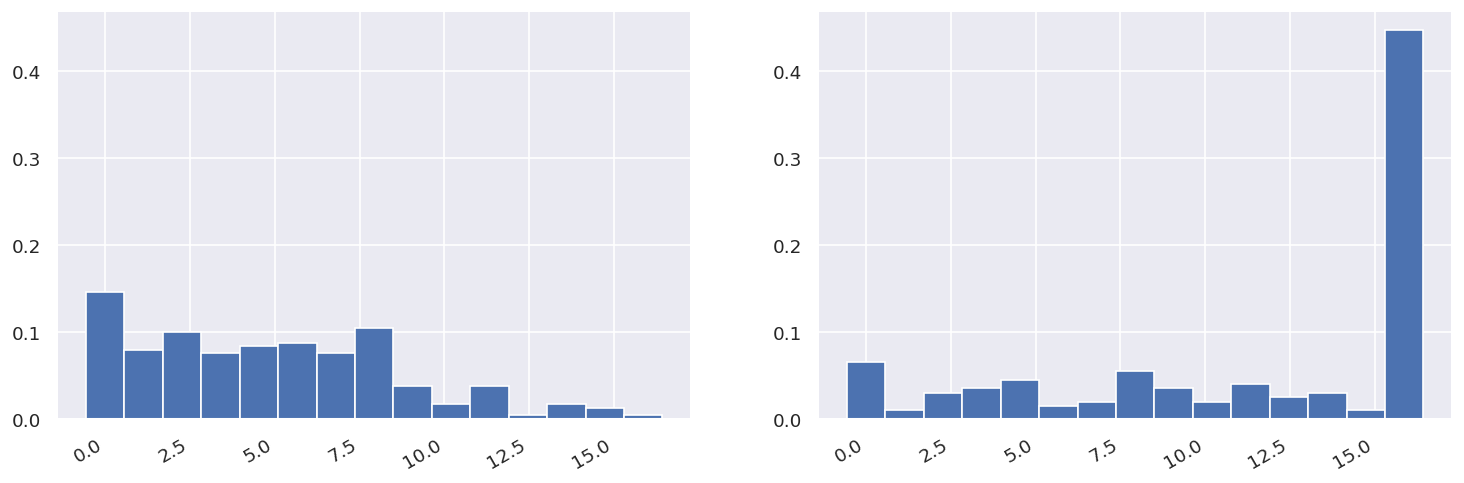

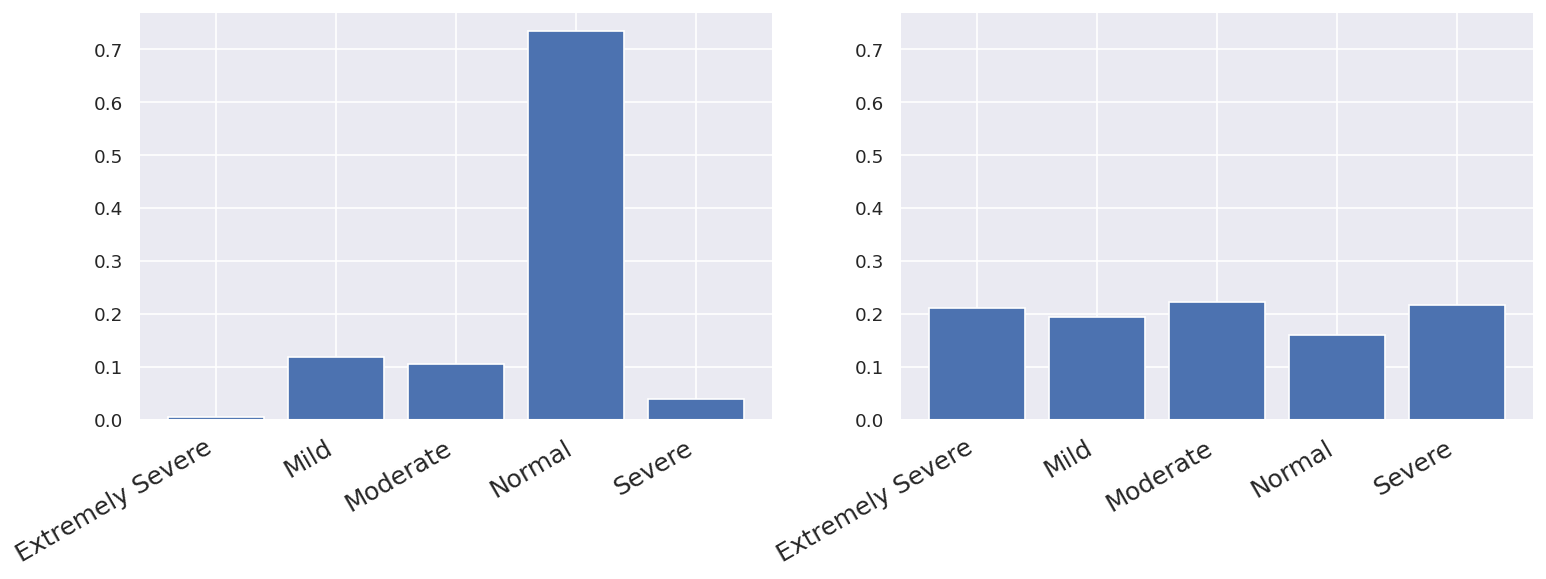

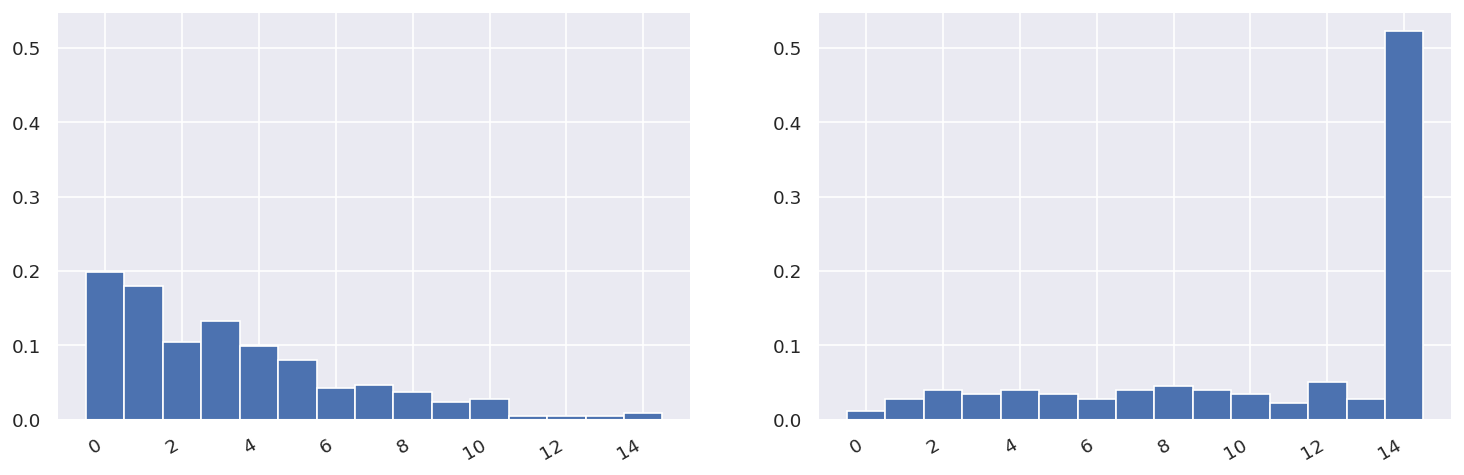

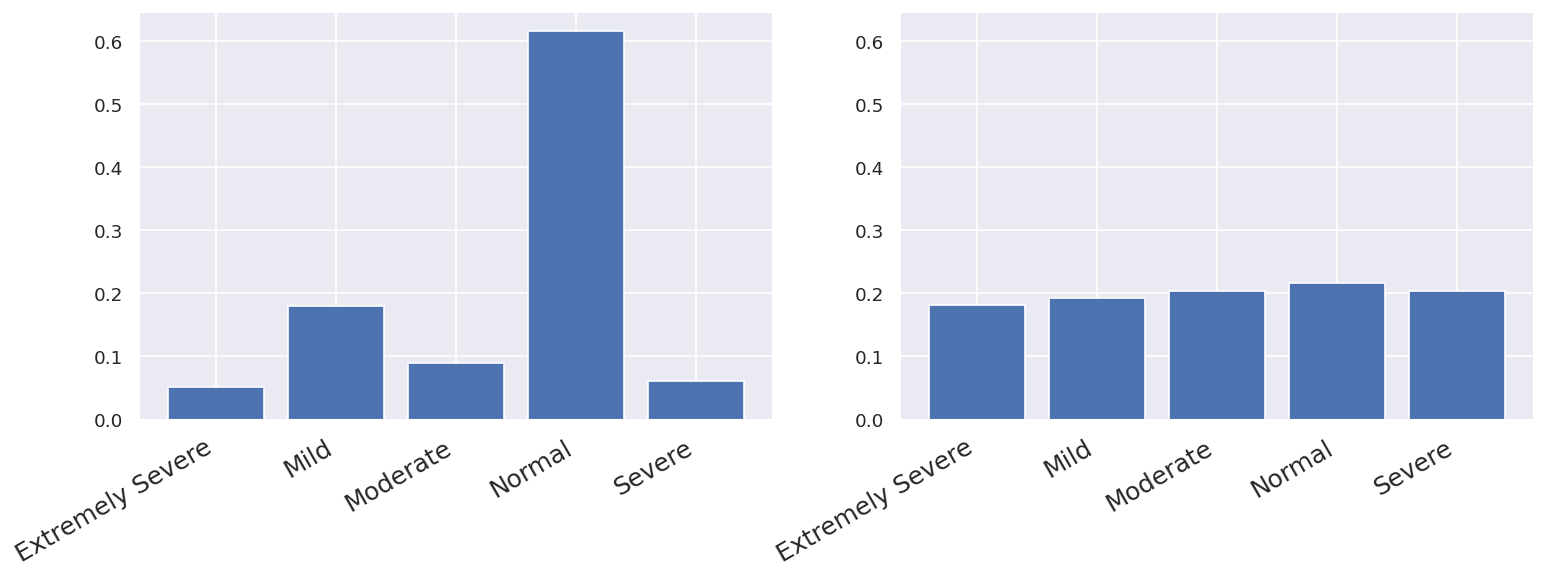

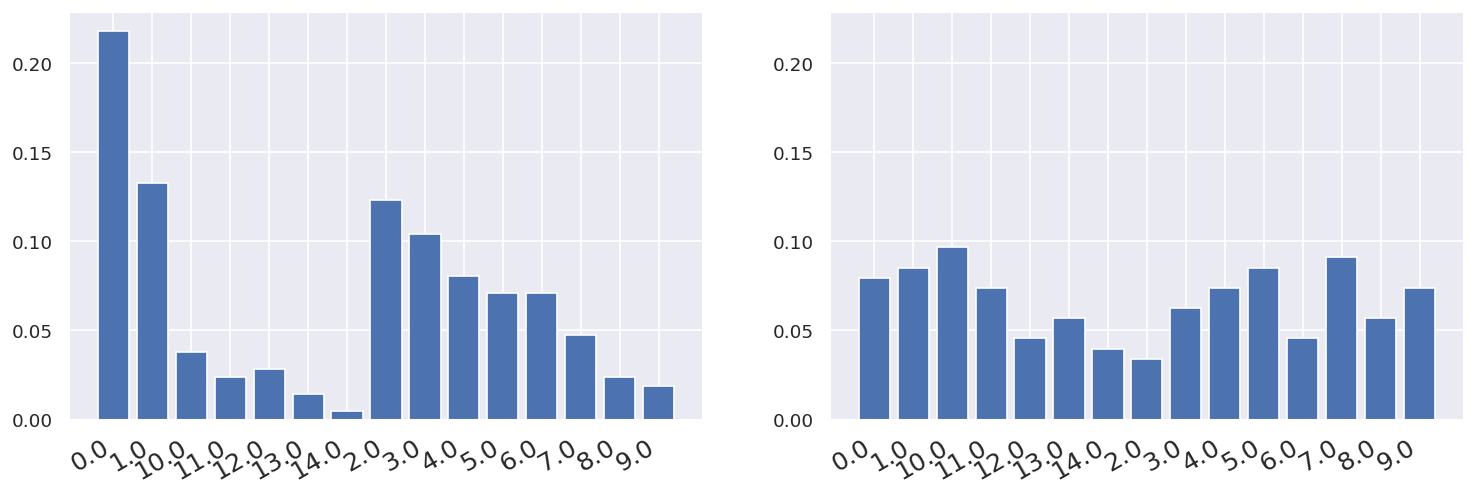

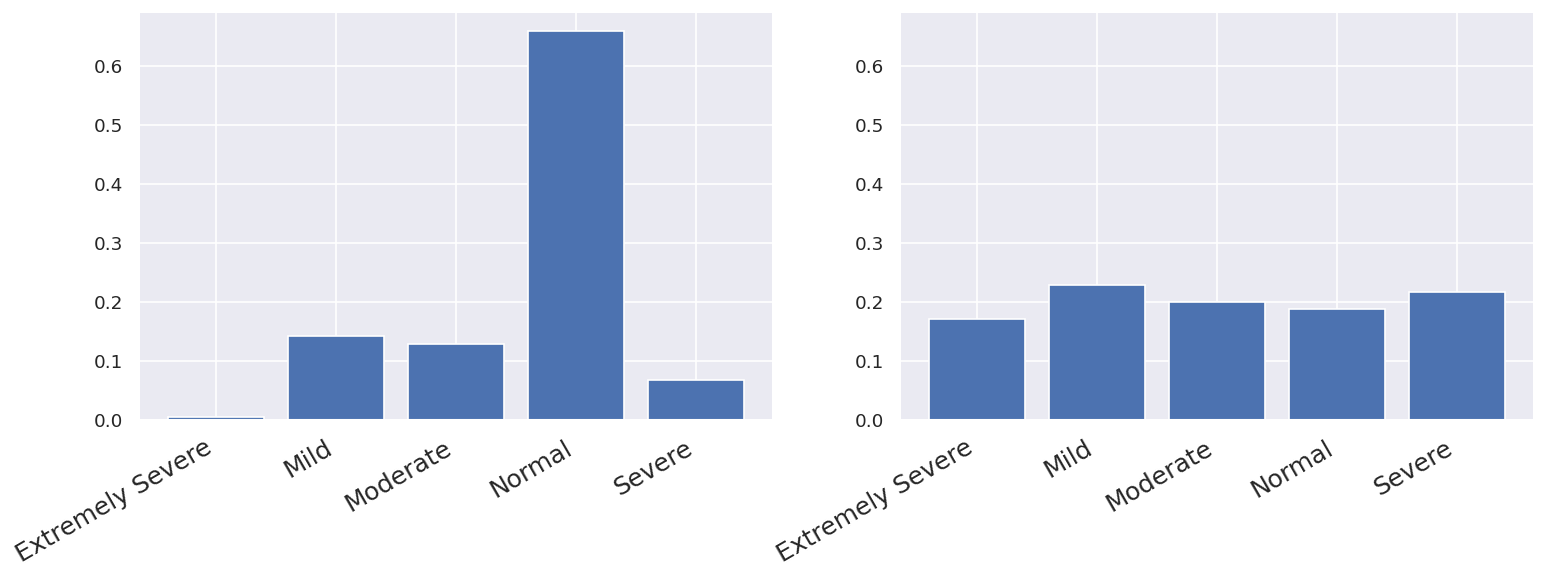

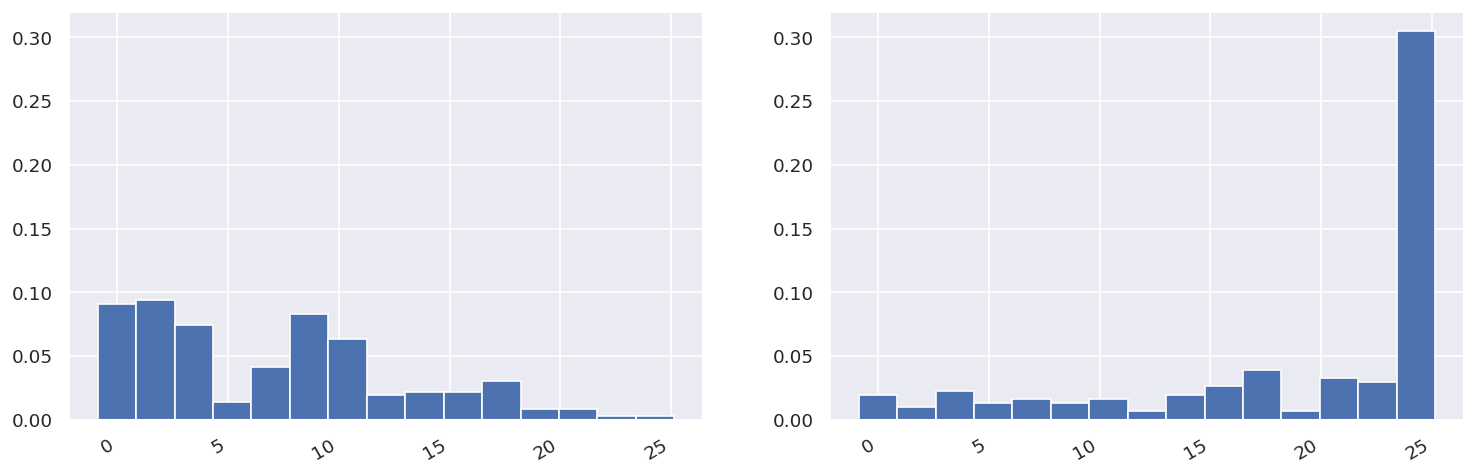

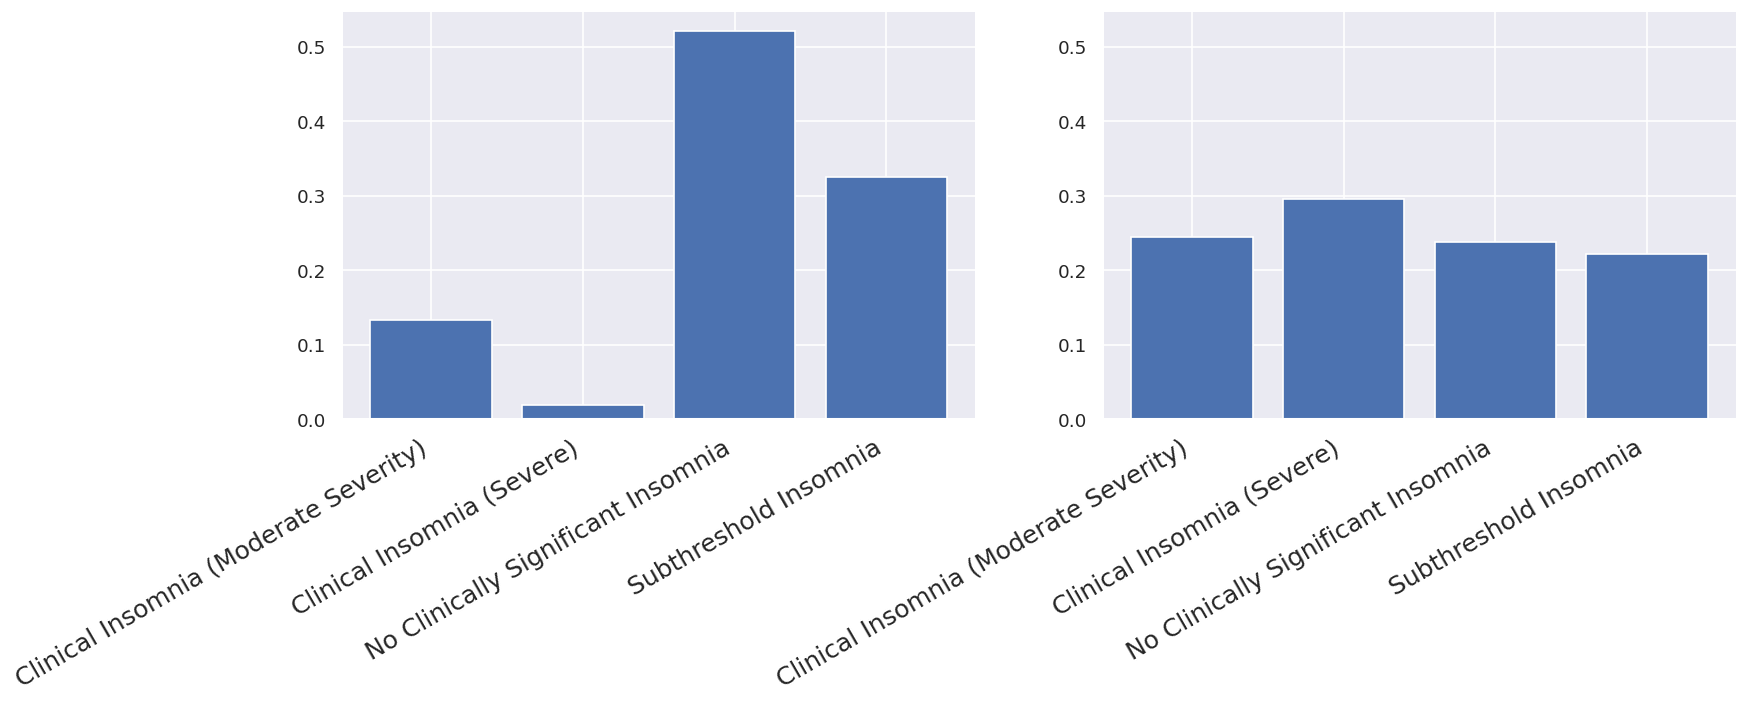

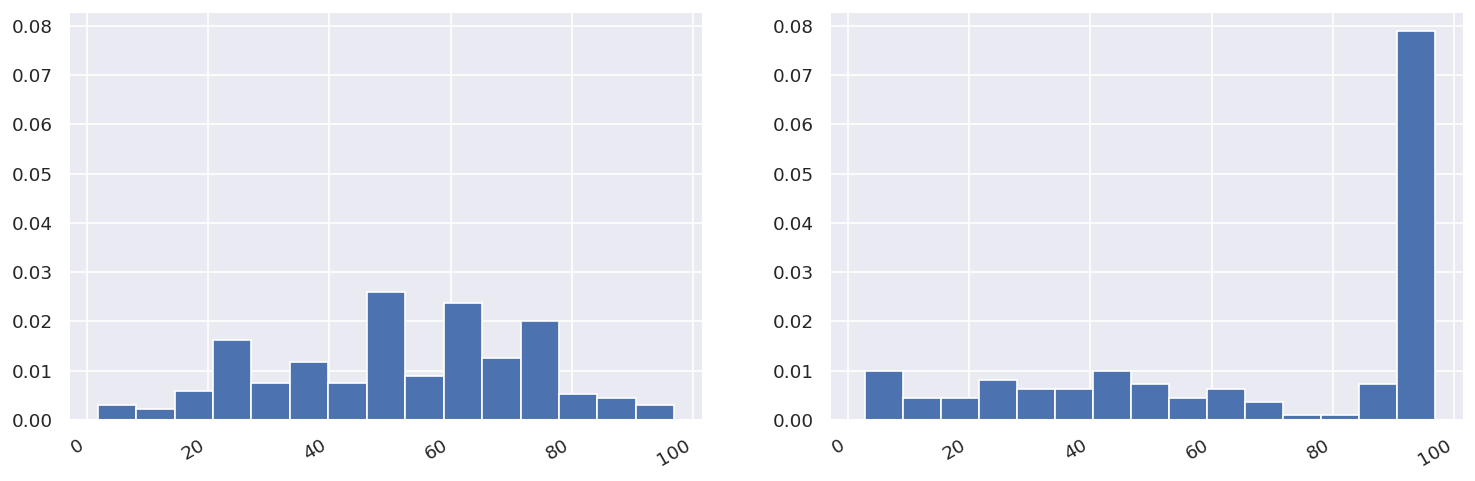

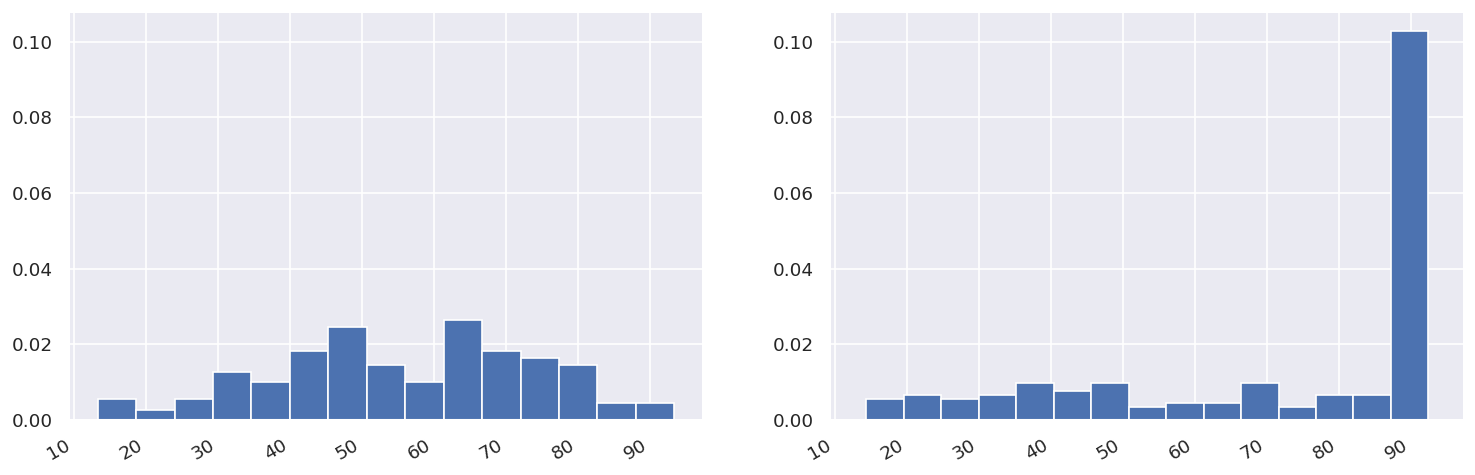

In [22]:
for attribute in synthetic_df.columns:
    inspector.compare_histograms(attribute)

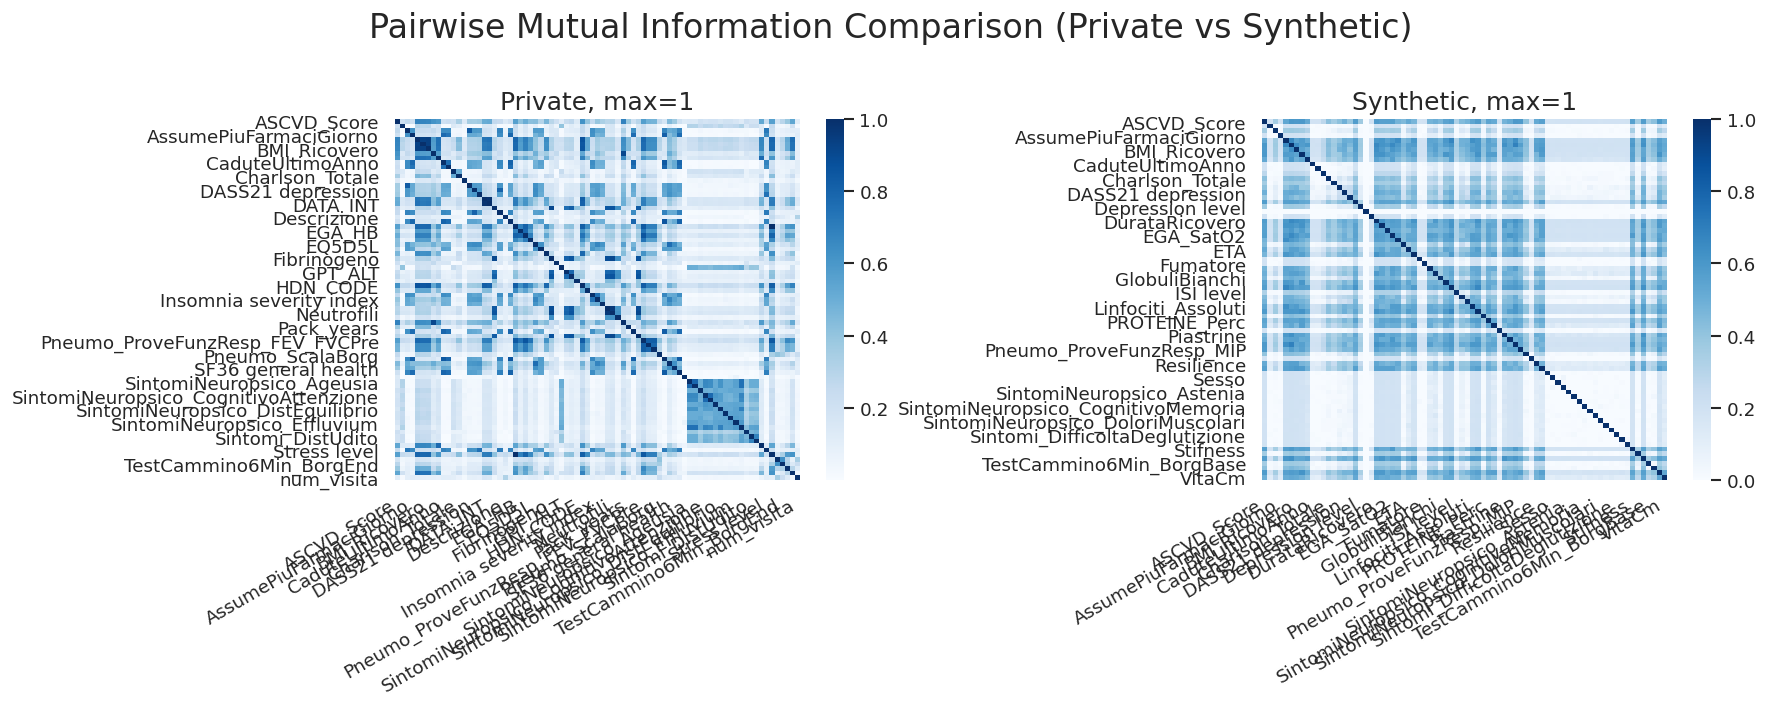

In [23]:
inspector.mutual_information_heatmap()

In [24]:
synthetic_df.head()

HDN_CODE Sesso   ETA  ASCVD_Score  Charlson_Totale  \
0  9427785.0     M  41.0    32.376095              3.0   
1  9427785.0     F  86.0     9.061187              2.0   
2  9427785.0     F  86.0    29.372674              1.0   
3  9427785.0     M  86.0     9.897088              2.0   
4  4821281.0     M  61.0    48.810000              2.0   

                      Charlson_Diabete   Stifness    CAP  \
0  2 = Con danneggiamento degli organi  14.119792  311.0   
1                               0 = No  20.200000  254.0   
2              1 = Senza complicazioni  20.200000  185.0   
3  2 = Con danneggiamento degli organi  20.200000  363.0   
4  2 = Con danneggiamento degli organi  20.200000  400.0   

   FrailtyPhenotypeBool     EGA_HB  ...  DASS21 stress      Stress level  \
0                   1.0  17.500000  ...           17.0          Moderate   
1                   1.0  17.500000  ...           17.0              Mild   
2                   0.0  17.500000  ...           16.0  Extremely Severe   
3                   1.0  11.245852  ...           12.0          Moderate   
4                   1.0  17.500000  ...           17.0            Severe   

   DASS21 anxiety  Anxiety level  DASS21 depression  Depression level  \
0            15.0         Normal               14.0            Severe   
1            15.0         Normal               13.0          Moderate   
2            15.0       Moderate                0.0  Extremely Severe   
3             4.0           Mild                3.0          Moderate   
4             4.0       Moderate                5.0              Mild   

  Insomnia severity index                              ISI level  \
0                    26.0     No Clinically Significant Insomnia   
1                    26.0     No Clinically Significant Insomnia   
2                    26.0  Clinical Insomnia (Moderate Severity)   
3                    22.0     No Clinically Significant Insomnia   
4                    12.0                  Subthreshold Insomnia   

   SF36 general health  Resilience  
0                 10.0        95.0  
1                 67.0        82.0  
2                 55.0        42.0  
3                100.0        95.0  
4                  9.0        24.0  

[5 rows x 76 columns]

In [30]:
synthetic_df[(synthetic_df['Charlson_Totale'] == 0) & (synthetic_df['Charlson_Diabete'].str.contains('1'))]

HDN_CODE Sesso   ETA  ASCVD_Score  Charlson_Totale  \
12   9427785.0     F  86.0    40.956623              0.0   
27   9427785.0     M  86.0    31.679527              0.0   
77   8266278.0     F  82.0     1.342710              0.0   
99   4587240.0     F  86.0    48.810000              0.0   
113  5411238.0     F  24.0    48.810000              0.0   
116  9427785.0     F  86.0    23.215884              0.0   
136  9427785.0     M  86.0    37.543911              0.0   
165  9427785.0     M  85.0     8.314057              0.0   
172   432951.0     F  80.0    22.578580              0.0   

            Charlson_Diabete   Stifness    CAP  FrailtyPhenotypeBool  \
12   1 = Senza complicazioni  20.200000  400.0                   0.0   
27   1 = Senza complicazioni  20.200000  400.0                   1.0   
77   1 = Senza complicazioni  13.212990  400.0                   1.0   
99   1 = Senza complicazioni  20.200000  400.0                   1.0   
113  1 = Senza complicazioni  20.200000  400.0                   1.0   
116  1 = Senza complicazioni  11.461145  266.0                   1.0   
136  1 = Senza complicazioni   4.187670  400.0                   0.0   
165  1 = Senza complicazioni  20.200000  400.0                   0.0   
172  1 = Senza complicazioni  14.155830  400.0                   1.0   

        EGA_HB  ...  DASS21 stress      Stress level  DASS21 anxiety  \
12   13.003048  ...            8.0            Normal            15.0   
27   11.726122  ...           17.0              Mild             9.0   
77   10.938581  ...           17.0          Moderate            15.0   
99   16.939623  ...            5.0          Moderate            15.0   
113  17.500000  ...            3.0            Normal            15.0   
116  17.500000  ...           14.0  Extremely Severe            10.0   
136  17.500000  ...           17.0            Normal            15.0   
165  15.357728  ...           17.0            Severe            15.0   
172  17.500000  ...           17.0          Moderate            15.0   

        Anxiety level  DASS21 depression  Depression level  \
12             Normal                8.0  Extremely Severe   
27             Normal               12.0            Severe   
77   Extremely Severe               10.0          Moderate   
99               Mild               10.0            Normal   
113          Moderate                5.0          Moderate   
116              Mild                9.0          Moderate   
136            Normal               11.0  Extremely Severe   
165            Severe                5.0            Severe   
172          Moderate                1.0              Mild   

    Insomnia severity index                              ISI level  \
12                     26.0                  Subthreshold Insomnia   
27                      6.0  Clinical Insomnia (Moderate Severity)   
77                     16.0             Clinical Insomnia (Severe)   
99                     26.0             Clinical Insomnia (Severe)   
113                    26.0                  Subthreshold Insomnia   
116                    26.0     No Clinically Significant Insomnia   
136                    26.0  Clinical Insomnia (Moderate Severity)   
165                     6.0             Clinical Insomnia (Severe)   
172                    26.0                  Subthreshold Insomnia   

     SF36 general health  Resilience  
12                  53.0        95.0  
27                 100.0        95.0  
77                  69.0        95.0  
99                 100.0        95.0  
113                 35.0        95.0  
116                 64.0        30.0  
136                 15.0        34.0  
165                 57.0        64.0  
172                100.0        29.0  

[9 rows x 76 columns]

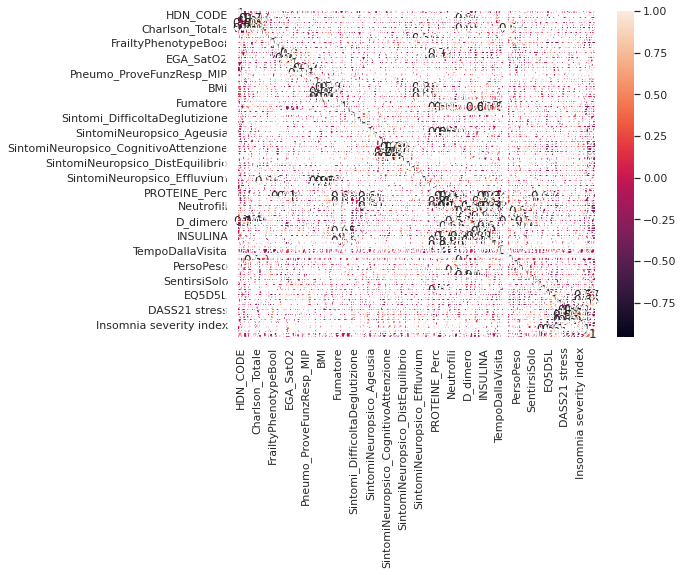

In [26]:
plt.figure(figsize=(8, 6))
sns.heatmap(dfSenzaData.corr(), annot=True)
plt.show()